# Covers de una decada icónica del siglo pasado (Amazon Music)

### Primer vistazo

Primero, importamos **pandas** como librería predilecta para leer y analizar nuestros datos.

In [1]:
import pandas as pd 

Imprimimos por pantalla los primeros 5 registros y los últimos 5 para tener un primer pantallazo con lo que estamos tratando.

In [2]:
raw_covers = pd.read_csv("Covers.csv")
raw_covers

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Abc,The Jackson 5,2:42,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970
1,Let It Be,The Beatles,4:03,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970
2,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970
3,Cecilia,Simon & Garfunkel,2:54,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970
4,Spirit In The Sky,Norman Greenbaum,4:02,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,6:15,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979
976,Don’t Cry Out Loud,Melissa Manchester,2:15,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979
977,When You’re In Love With A Beautiful Woman,Dr. Hook,2:54,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979
978,I’ll Never Love This Way Again,Dionne Warwick,2:58,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979


## Análisis exploratorio

### Tipo de Datos

Vemos las características estructurales de nuestro dataset.

In [3]:
raw_covers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

### Descripción estadística de las variables

In [4]:
raw_covers.describe()

,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,3.940816,0.587693,0.580877,5.191837,-9.863873,0.760204,0.059923,0.332959,0.048240,0.176269,0.621149,118.872768,53.289796,1974.563265
std,0.279660,0.157856,0.202379,3.577814,3.718417,0.427177,0.065535,0.280076,0.165712,0.155862,0.251799,27.023443,18.262967,2.850564
min,1.000000,0.094200,0.005320,0.000000,-31.646000,0.000000,0.023200,0.000022,0.000000,0.015000,0.000010,53.986000,0.000000,1970.000000
25%,4.000000,0.486000,0.428000,2.000000,-12.358500,1.000000,0.031300,0.076550,0.000000,0.086300,0.421750,99.919750,43.000000,1972.000000
50%,4.000000,0.600000,0.583000,5.000000,-9.558500,1.000000,0.038300,0.270500,0.000050,0.119000,0.650500,117.436500,56.000000,1975.000000
75%,4.000000,0.698000,0.731250,8.250000,-7.095500,1.000000,0.056725,0.544250,0.002822,0.198250,0.845000,134.007750,66.000000,1977.000000
max,5.000000,0.985000,0.995000,11.000000,-2.340000,1.000000,0.737000,0.996000,0.970000,0.985000,0.989000,211.270000,90.000000,1979.000000


### Limpieza de nuestro conjunto

Buscamos tuplas repetidas y para eso tomamos como clave la dupla Artista-Canción para encontrarlos.

In [5]:
cancion_repetida = raw_covers.groupby(['Artist','Track']).value_counts()
print(cancion_repetida)

Artist                    Track                                            Duration  Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  Tempo    Popularity  Year
100 Proof (Aged in Soul)  Somebody’s Been Sleeping                         2:42      4               0.799         0.528   11   -15.649   0     0.0731       0.01220       0.739000          0.0479    0.826    148.030  13          1970    1
10cc                      I’m Not In Love                                  3:49      4               0.472         0.968   7    -5.322    0     0.1820       0.00476       0.001900          0.3610    0.158    135.953  37          1975    1
                          The Things We Do For Love                        3:27      4               0.637         0.528   1    -9.837    1     0.0394       0.16300       0.000000          0.1220    0.781    106.949  64          1977    1
8th Day                   She’s Not Just Another 

A primera vista, observamos que al agrupar nuestro conjunto e imprimirlo, obtenemos 980 filas, que es la misma cantidad inicial. Entonces podemos concluir que **no tenemos registros repetidos** en nuestros datos.

Buscamos valores nulos.

In [6]:
raw_covers.isnull().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

No tenemos valores nulos en nuestro conjunto.

In [7]:
raw_covers.isna().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

No tenemos valores Not a Number en nuestro conjunto.

Buscamos posibles valores nulos o errores de carga en las variables cualitativas.

In [8]:
raw_covers['Artist'].value_counts(ascending=False)

Artist
Elton John                                     15
Bee Gees                                       14
The Carpenters                                 12
Chicago                                        10
Stevie Wonder                                  10
                                               ..
Clint Holmes                                    1
Jermaine Jackson                                1
the DeFranco Family featuring Tony DeFranco     1
Marie Osmond                                    1
GQ                                              1
Name: count, Length: 530, dtype: int64

In [9]:
raw_covers['Track'].value_counts(ascending=False)

Track
On And On                           2
Never Can Say Goodbye               2
Don’t It Make My Brown Eyes Blue    2
How Deep Is Your Love               2
Dance With Me                       2
                                   ..
The Cover Of The Rolling Stone      1
Right Place Wrong Time              1
Frankenstein                        1
Here I Am (COME And Take Me)        1
Dim All The Nights                  1
Name: count, Length: 965, dtype: int64

Imprimimos todos los datos para encontrar valores extraños o que nos hagan ruido.

In [10]:
for artista, cancion in raw_covers['Artist'].value_counts().items():
    print(artista, cancion)

Elton John 15
Bee Gees 14
The Carpenters 12
Chicago 10
Stevie Wonder 10
Three Dog Night 9
Barry Manilow 9
Eagles 9
Electric Light Orchestra 8
Earth, Wind & Fire 8
Helen Reddy 7
Gladys Knight & the Pips 7
Donna Summer 7
Olivia Newton-John 7
John Denver 7
Al Green 7
Commodores 7
Captain & Tennille 7
War 6
Linda Ronstadt 6
The Jackson 5 6
Fleetwood Mac 6
The O’Jays 6
Paul McCartney & Wings 6
Anne Murray 5
America 5
Paul Simon 5
Steve Miller Band 5
Marvin Gaye 5
Alice Cooper 5
KC and the Sunshine Band 5
Carly Simon 5
Neil Diamond 5
Tony Orlando and Dawn 5
Andy Gibb 5
Cher 5
Ringo Starr 5
Barbra Streisand 5
Barry White 5
Jim Croce 4
Donny Osmond 4
Diana Ross 4
Cat Stevens 4
Rod Stewart 4
Michael Jackson 4
Billy Preston 4
Aretha Franklin 4
Steely Dan 4
The Rolling Stones 4
The Temptations 4
Kenny Rogers 4
Bob Seger & The Silver Bullet Band 4
Bread 4
Bay City Rollers 4
James Taylor 4
Foreigner 4
Sweet 4
Chic 4
Queen 4
Shaun Cassidy 3
Little River Band 3
Gordon Lightfoot 3
Lobo 3
Bill Withers 

Comprobamos los datos de los Artistas llamados "10cc", "GQ", "M" solo por tener nombres extraños y asegurarnos de que no sean muestras basura.

In [11]:
lista = ['10cc', 'GQ', 'M']
covers_filtrado = raw_covers[raw_covers['Artist'].isin(lista)]
covers_filtrado

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
560,I’m Not In Love,10cc,3:49,4,0.472,0.968,7,-5.322,0,0.1820,0.00476,0.00190,0.3610,0.158,135.953,37,1975
718,The Things We Do For Love,10cc,3:27,4,0.637,0.528,1,-9.837,1,0.0394,0.16300,0.00000,0.1220,0.781,106.949,64,1977
944,Pop Muzik,M,3:48,4,0.912,0.673,2,-8.910,1,0.1090,0.09950,0.00000,0.1030,0.123,120.157,56,1979
968,Disco Nights (ROCK-FREAK),GQ,5:54,4,0.798,0.528,5,-12.228,0,0.0531,0.01160,0.00379,0.0446,0.898,122.610,39,1979


Todos son datos válidos asique no tenemos que eliminar ni transformar nada.

### Conversión de tipos

Transformarmos la variable **Duration** de un tipo **string** a un tipo **float**.

In [12]:
covers_duracion_transformada = raw_covers.copy()
covers_duracion_transformada['Duration'] = raw_covers['Duration'].str.replace(':','.').astype(float)
covers_duracion_transformada['Duration']

0      2.42
1      4.03
2      2.56
3      2.54
4      4.02
       ... 
975    6.15
976    2.15
977    2.54
978    2.58
979    4.08
Name: Duration, Length: 980, dtype: float64

Completamos el análisis descriptivo anterior.

In [13]:
covers_duracion_transformada['Duration'].describe()

count    980.000000
mean       3.609041
std        1.387657
min        1.160000
25%        3.040000
50%        3.350000
75%        4.120000
max       26.010000
Name: Duration, dtype: float64

Le aplicamos una transformación a **Loudness** para poder conservar sus valores de decibelios.

In [14]:
covers_duracion_y_loudness_transformada = covers_duracion_transformada.copy()
covers_duracion_y_loudness_transformada['Loudness'] = covers_duracion_transformada['Loudness'].abs() / 100
covers_duracion_y_loudness_transformada['Loudness'].describe()

count    980.000000
mean       0.098639
std        0.037184
min        0.023400
25%        0.070955
50%        0.095585
75%        0.123585
max        0.316460
Name: Loudness, dtype: float64

### Matriz de correlación

Generamos la matriz de correlación para comenzar nuestro análisis bivariado.

In [15]:
covers_sin_track_artist = covers_duracion_y_loudness_transformada.drop(['Track','Artist'], axis=1)
matriz_correlacion = covers_sin_track_artist.corr()
matriz_correlacion

,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
Duration,1.000000,-0.004463,-0.047164,-0.003672,0.045059,0.064686,-0.080998,0.010918,-0.106135,0.066365,0.012645,-0.089477,-0.051571,0.038248,0.101437
Time_Signature,-0.004463,1.000000,0.187562,0.204889,-0.015184,-0.067192,-0.007765,0.062508,-0.162942,-0.010567,-0.027574,0.196694,-0.028967,0.037160,-0.017081
Danceability,-0.047164,0.187562,1.000000,0.214106,0.007224,-0.117018,-0.074487,0.122851,-0.289435,-0.072341,-0.203165,0.543124,-0.126015,0.110817,0.120210
Energy,-0.003672,0.204889,0.214106,1.000000,-0.045086,-0.670980,-0.076433,0.183647,-0.602552,-0.072815,0.124811,0.407548,0.136926,0.065086,0.004188
Key,0.045059,-0.015184,0.007224,-0.045086,1.000000,0.059878,-0.164355,0.002664,0.032761,-0.017979,0.054373,-0.015310,-0.006183,-0.042028,-0.038449
Loudness,0.064686,-0.067192,-0.117018,-0.670980,0.059878,1.000000,0.011323,-0.132885,0.406708,0.232382,-0.062452,-0.107765,-0.082913,-0.129457,-0.025810
Mode,-0.080998,-0.007765,-0.074487,-0.076433,-0.164355,0.011323,1.000000,-0.077697,0.104428,-0.086634,0.047852,0.000277,-0.010323,-0.043979,-0.051700
Speechiness,0.010918,0.062508,0.122851,0.183647,0.002664,-0.132885,-0.077697,1.000000,-0.118307,-0.027544,0.099635,0.000405,0.075824,0.004400,-0.049025
Acousticness,-0.106135,-0.162942,-0.289435,-0.602552,0.032761,0.406708,0.104428,-0.118307,1.000000,0.079800,0.006178,-0.282954,-0.086766,-0.108711,-0.105284
Instrumentalness,0.066365,-0.010567,-0.072341,-0.072815,-0.017979,0.232382,-0.086634,-0.027544,0.079800,1.000000,-0.005047,-0.093971,-0.051441,-0.101959,-0.020297


Implementamos un mapa de calor.

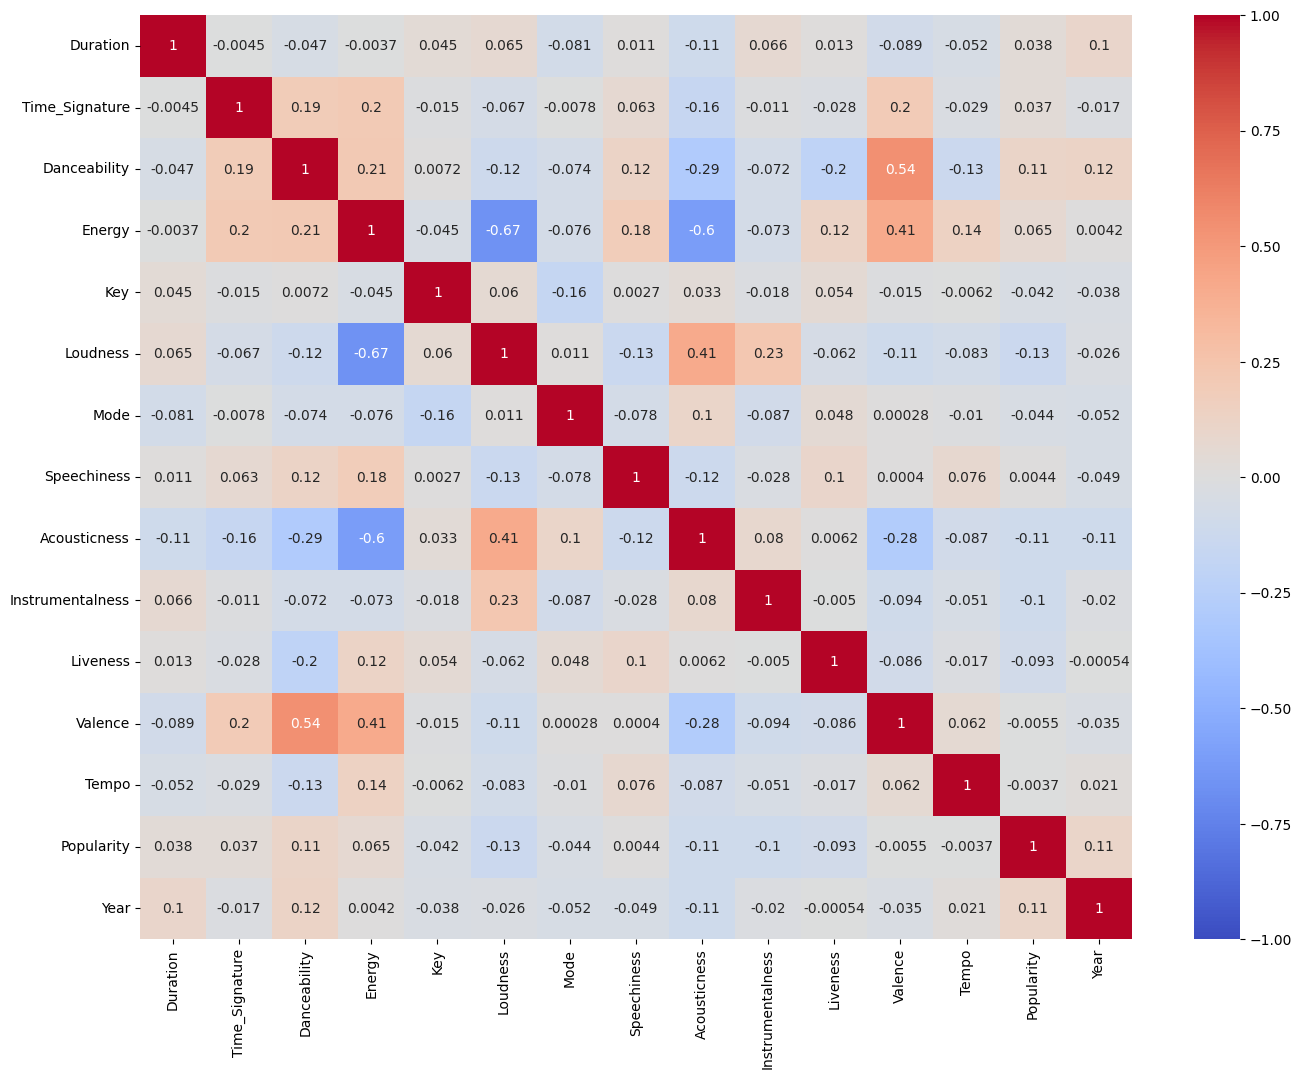

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(matriz_correlacion, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Eliminamos la diagonal principal y dejamos solamente aquellas correlaciónes con un coeficiente de Pearson mayor a 0.4

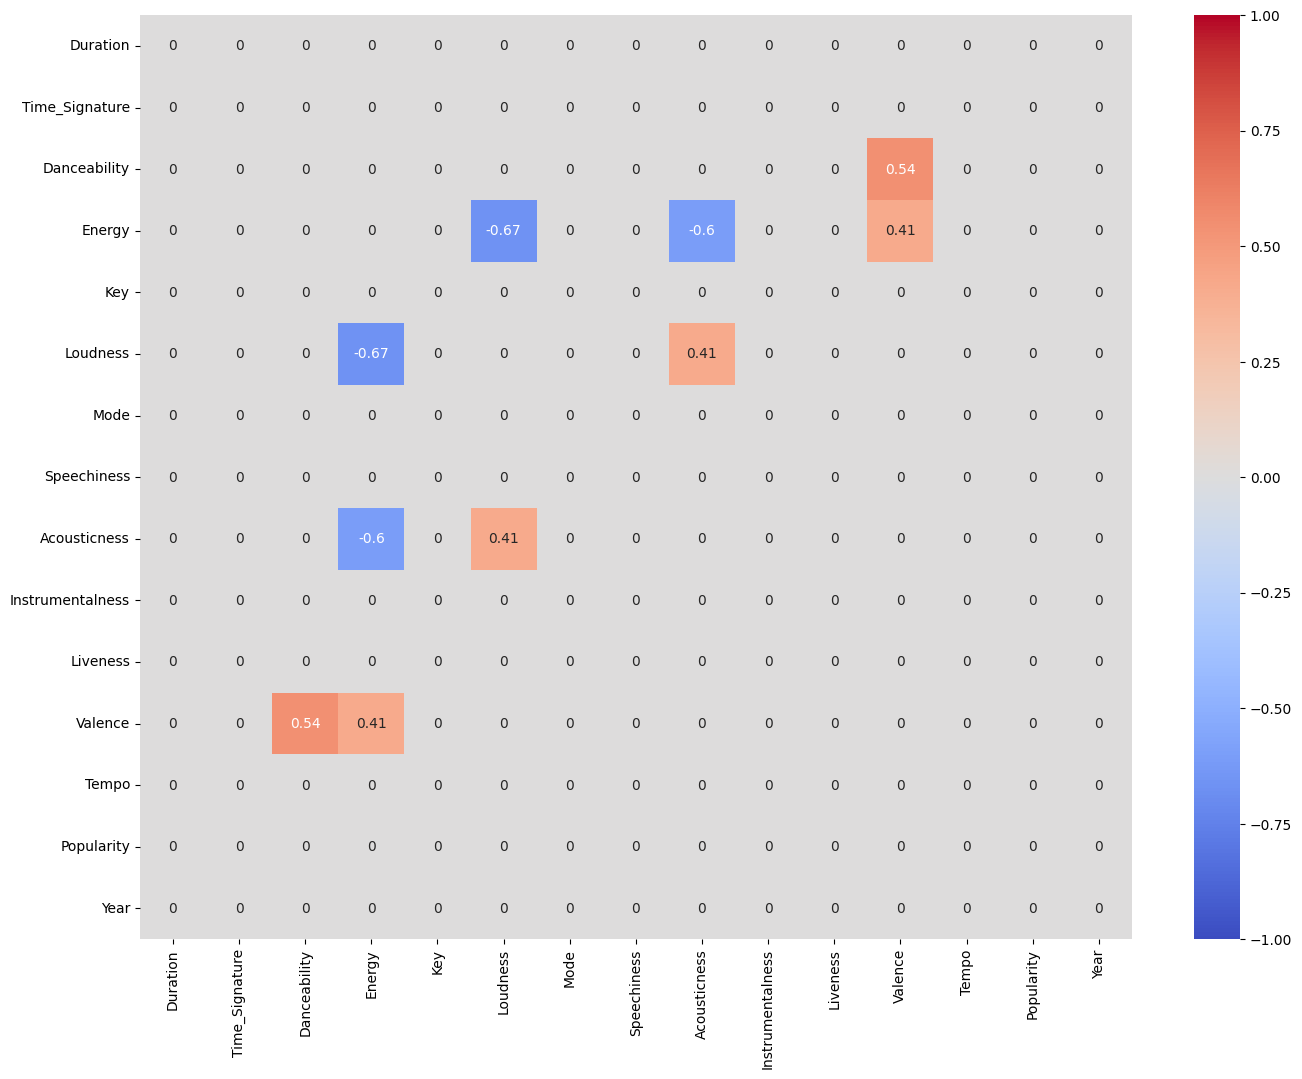

In [17]:
import numpy as np

matriz_correlacion_ajustada = matriz_correlacion.where(matriz_correlacion.abs() > 0.4, 0)
np.fill_diagonal(matriz_correlacion_ajustada.values, 0)

plt.figure(figsize=(16,12))
sns.heatmap(matriz_correlacion_ajustada, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Las variables de nuestro conjunto a las que estudiaremos su correlación son:

**Danceability** - **Valence**

**Energy** - **Loudness**

**Energy** - **Acousticness**

**Energy** - **Valence**

**Loudness** - **Acousticness**

### Estudio univariado

Hacemos el análisis univariadoa de las variables con las que vamos a trabajar, usando su histograma y su boxplot.

#### Danceability

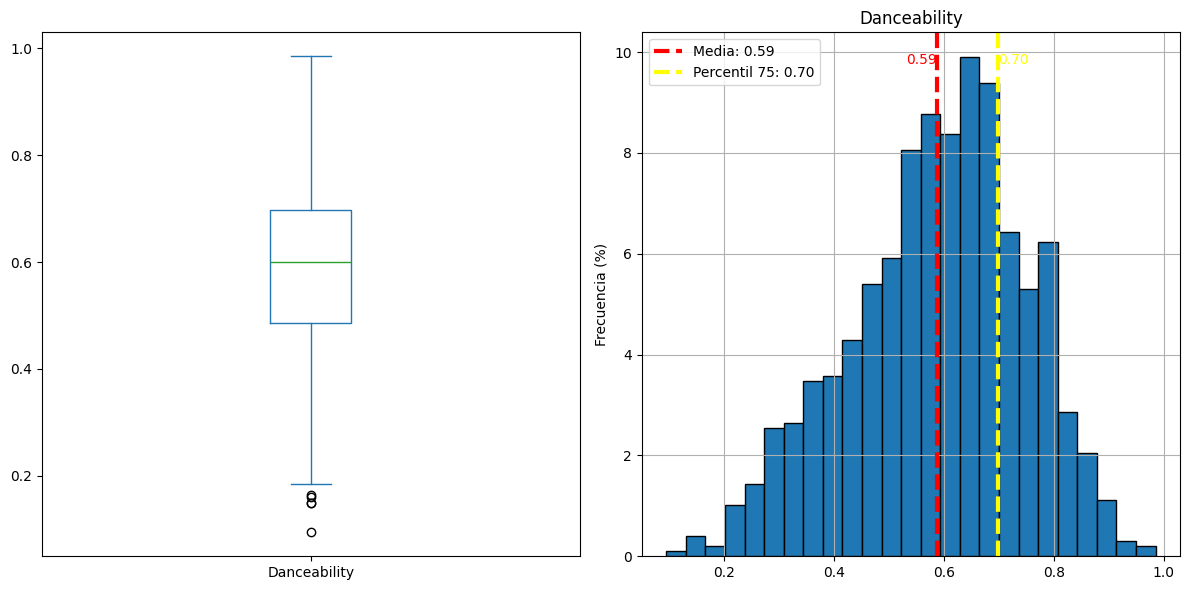

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Danceability'].plot.box(ax=axes[0])

dance_hist = covers_sin_track_artist['Danceability'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Danceability"]) + 1. / covers_sin_track_artist["Danceability"].size * 100, edgecolor='black', ax=axes[1])
dance_hist.set_title("Danceability")
dance_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Danceability'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Danceability'], 75)
dance_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
dance_hist.text(media, dance_hist.get_ylim()[1] * 0.95, f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
dance_hist.text(cuartil3, dance_hist.get_ylim()[1] * 0.95, f'{cuartil3:.2f}', color='yellow', ha='left', va='center_baseline', rotation=0)
dance_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

dance_hist.legend()

plt.tight_layout()
plt.show()

In [19]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Danceability'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Danceability'].kurtosis():.2f}")

Coeficiente de asimetría: -0.34
Kurtosis: -0.29


In [20]:
from scipy.stats import shapiro

stat, p = shapiro(covers_sin_track_artist['Danceability'])
print(f"Test de Shapiro-Wilk para Danceability: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Danceability: Estadístico=0.988, p-valor=0.000


#### Valence

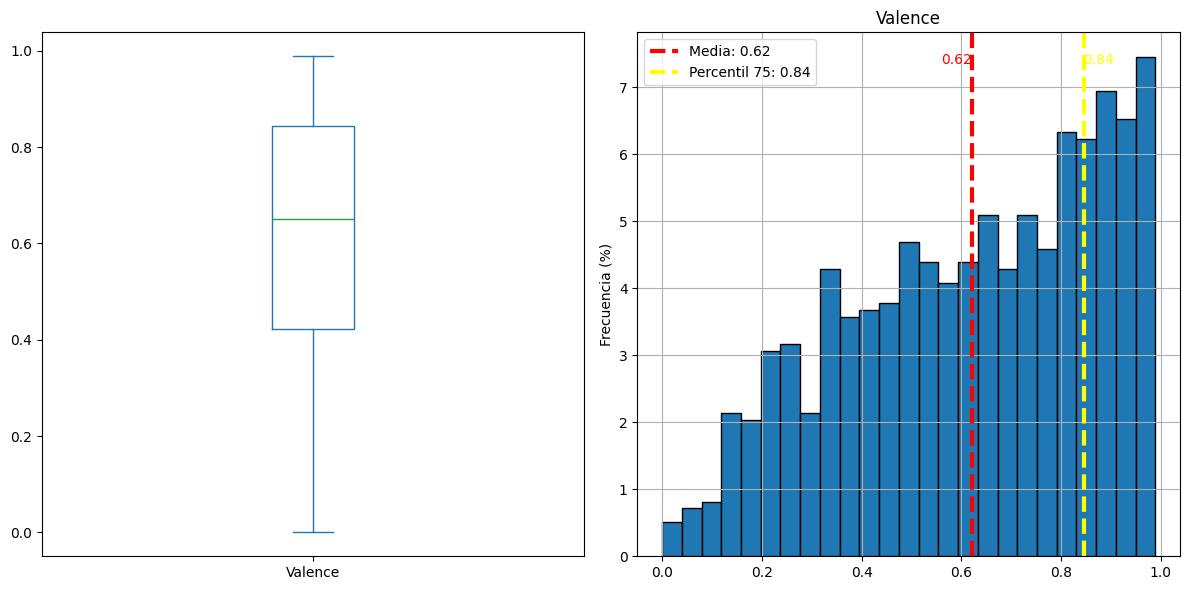

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Valence'].plot.box(ax=axes[0])

valence_hist = covers_sin_track_artist['Valence'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Valence"]) + 1. / covers_sin_track_artist["Valence"].size * 100, edgecolor='black', ax=axes[1])
valence_hist.set_title("Valence")
valence_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Valence'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Valence'], 75)
valence_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
valence_hist.text(media, valence_hist.get_ylim()[1] * 0.95, f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
valence_hist.text(cuartil3, valence_hist.get_ylim()[1] * 0.95, f'{cuartil3:.2f}', color='yellow', ha='left', va='center_baseline', rotation=0)
valence_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

valence_hist.legend()

plt.tight_layout()
plt.show()

In [22]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Valence'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Valence'].kurtosis():.2f}")

Coeficiente de asimetría: -0.39
Kurtosis: -0.95


In [23]:
stat, p = shapiro(covers_sin_track_artist['Popularity'])
print(f"Test de Shapiro-Wilk para Valence: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Valence: Estadístico=0.954, p-valor=0.000


Procedemos a controlar la alta frecuencia de valores máximos.

In [24]:
# Creamos una copia para no alterar ni el orden de los datos en el dataset original
copia_para_valence = raw_covers.copy()

# Ordenamos los valores de forma ascendente
df_valence = copia_para_valence.sort_values(by='Valence', ascending=False)

In [25]:
# Desactivamos la opcion de Pandas que nos limita la cantidad de filas a mostrar para nuestro chequeo
pd.set_option('display.max_rows', None)

In [26]:
df_valence['Valence']

498    0.98900
900    0.98500
883    0.98100
162    0.97900
169    0.97800
9      0.97300
196    0.97200
756    0.97100
270    0.97100
116    0.97100
50     0.97100
110    0.97100
366    0.97100
701    0.97000
497    0.97000
114    0.96900
306    0.96900
191    0.96900
421    0.96900
177    0.96900
630    0.96900
668    0.96800
928    0.96800
290    0.96800
515    0.96700
218    0.96700
665    0.96700
513    0.96700
590    0.96700
917    0.96600
880    0.96600
100    0.96600
640    0.96500
249    0.96500
773    0.96500
566    0.96400
460    0.96400
287    0.96400
936    0.96400
889    0.96300
559    0.96300
651    0.96300
456    0.96300
346    0.96300
770    0.96300
107    0.96300
596    0.96300
531    0.96200
527    0.96200
376    0.96200
342    0.96200
592    0.96200
677    0.96200
340    0.96200
175    0.96200
603    0.96200
49     0.96100
605    0.96100
891    0.96100
637    0.96100
855    0.96100
870    0.96000
382    0.96000
946    0.96000
384    0.95700
27     0.95600
523    0.9

No tenemos datos mal cargados.

In [27]:
# Volvemos a establecer la configuración inicial de Pandas
pd.reset_option('display.max_rows')

#### Energy

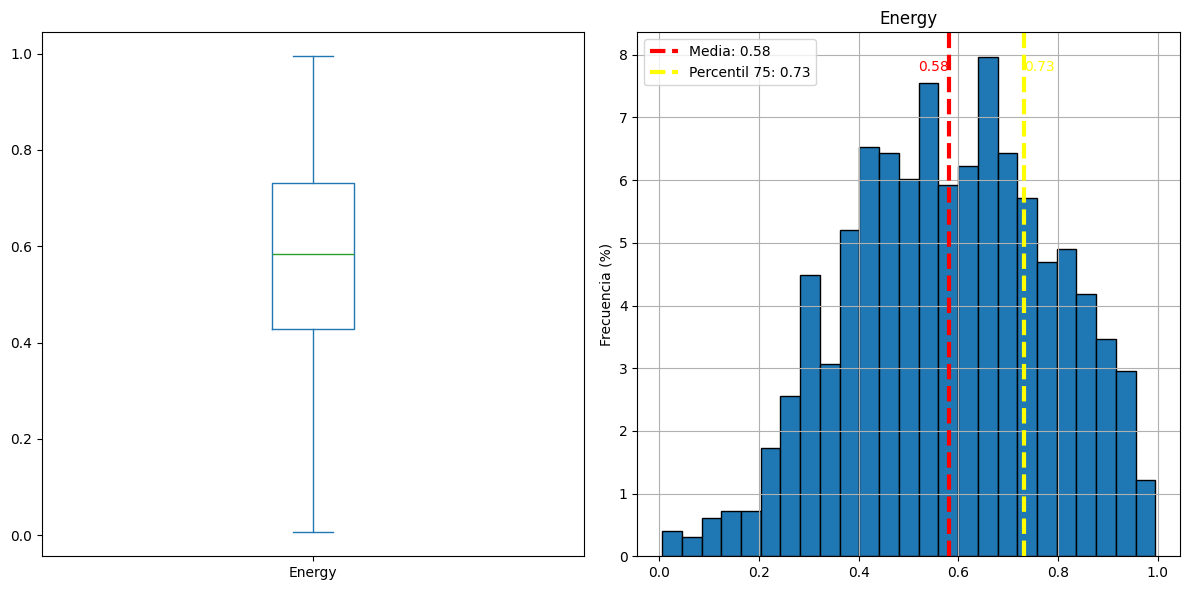

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Energy'].plot.box(ax=axes[0])

energy_hist = covers_sin_track_artist['Energy'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Energy"]) + 1. / covers_sin_track_artist["Energy"].size * 100, edgecolor='black', ax=axes[1])
energy_hist.set_title("Energy")
energy_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Energy'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Energy'], 75)
energy_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
energy_hist.text(media, valence_hist.get_ylim()[1], f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
energy_hist.text(cuartil3, valence_hist.get_ylim()[1], f'{cuartil3:.2f}', color='yellow', ha='left', va='center_baseline', rotation=0)
energy_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

energy_hist.legend()

plt.tight_layout()
plt.show()

In [29]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Energy'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Energy'].kurtosis():.2f}")

Coeficiente de asimetría: -0.14
Kurtosis: -0.58


In [30]:
stat, p = shapiro(covers_sin_track_artist['Energy'])
print(f"Test de Shapiro-Wilk para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Energy: Estadístico=0.989, p-valor=0.000


#### Loudness

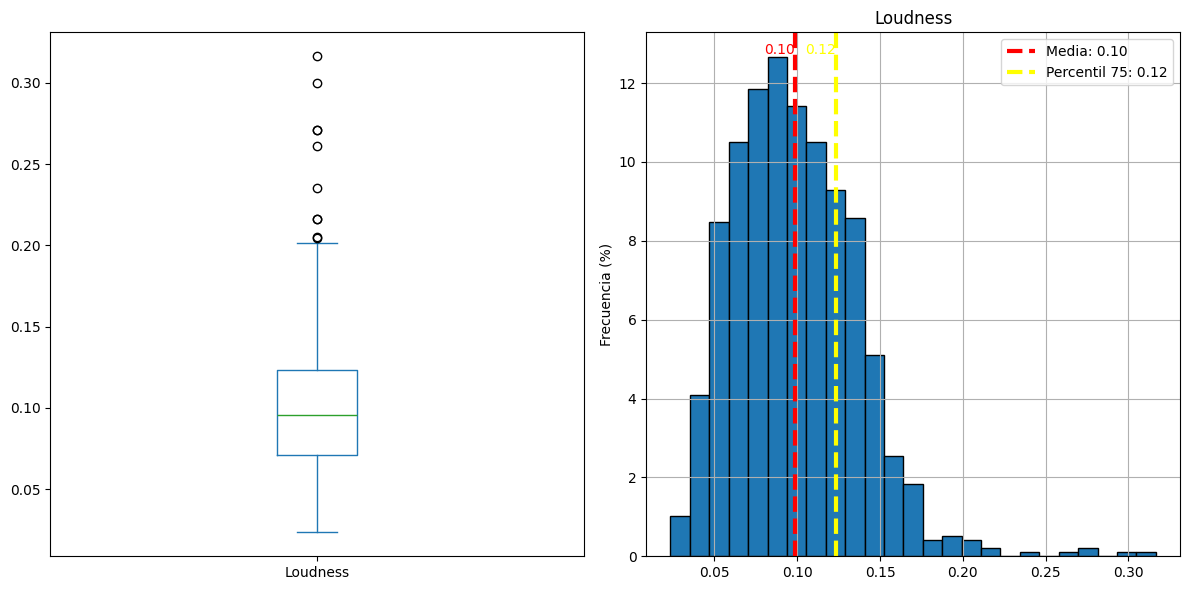

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Loudness'].plot.box(ax=axes[0])

loudness_hist = covers_sin_track_artist['Loudness'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Loudness"]) + 1. / covers_sin_track_artist["Loudness"].size * 100, edgecolor='black', ax=axes[1])
loudness_hist.set_title("Loudness")
loudness_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Loudness'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Loudness'], 75)
loudness_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
loudness_hist.text(media, loudness_hist.get_ylim()[1] * 0.97, f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
loudness_hist.text(cuartil3, loudness_hist.get_ylim()[1] * 0.97, f'{cuartil3:.2f}', color='yellow', ha='right', va='center_baseline', rotation=0)
loudness_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

loudness_hist.legend()

plt.tight_layout()
plt.show()

In [32]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Loudness'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Loudness'].kurtosis():.2f}")

Coeficiente de asimetría: 0.94
Kurtosis: 2.67


In [33]:
stat, p = shapiro(covers_sin_track_artist['Loudness'])
print(f"Test de Shapiro-Wilk para Loudness: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Loudness: Estadístico=0.955, p-valor=0.000


#### Acousticness

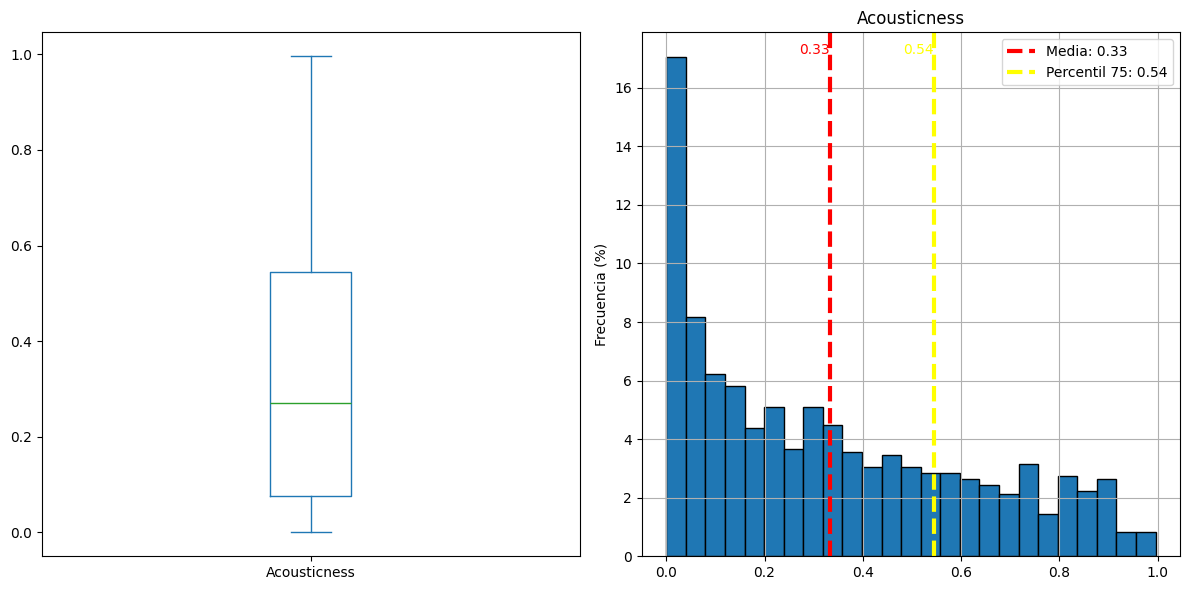

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Acousticness'].plot.box(ax=axes[0])

acousticness_hist = covers_sin_track_artist['Acousticness'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Acousticness"]) + 1. / covers_sin_track_artist["Acousticness"].size * 100, edgecolor='black', ax=axes[1])
acousticness_hist.set_title("Acousticness")
acousticness_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Acousticness'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Acousticness'], 75)
acousticness_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
acousticness_hist.text(media, acousticness_hist.get_ylim()[1] * 0.97, f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
acousticness_hist.text(cuartil3, acousticness_hist.get_ylim()[1] * 0.97, f'{cuartil3:.2f}', color='yellow', ha='right', va='center_baseline', rotation=0)
acousticness_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

acousticness_hist.legend()

plt.tight_layout()
plt.show()

In [35]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Acousticness'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Acousticness'].kurtosis():.2f}")

Coeficiente de asimetría: 0.59
Kurtosis: -0.84


In [36]:
stat, p = shapiro(covers_sin_track_artist['Acousticness'])
print(f"Test de Shapiro-Wilk para Acousticness: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Acousticness: Estadístico=0.912, p-valor=0.000


Controlamos la alta frecuencia de valores mínimos.

In [37]:
# Creamos una copia para no alterar ni el orden de los datos en el dataset original
copia_para_acousticness = raw_covers.copy()

# Ordenamos los valores de forma ascendente
df = copia_para_acousticness.sort_values(by='Acousticness', ascending=True)

In [38]:
# Desactivamos la opcion de Pandas que nos limita la cantidad de filas a mostrar para nuestro chequeo
pd.set_option('display.max_rows', None)

In [39]:
df['Acousticness']

888    0.000022
301    0.000109
21     0.000133
585    0.000215
143    0.000261
89     0.000274
436    0.000280
577    0.000288
7      0.000385
567    0.000598
702    0.000668
399    0.000668
36     0.000689
105    0.000779
182    0.000854
687    0.000880
839    0.000990
932    0.001030
901    0.001070
852    0.001130
975    0.001150
484    0.001190
766    0.001210
125    0.001210
866    0.001450
525    0.001460
423    0.001510
382    0.001620
499    0.001650
140    0.001900
576    0.002000
536    0.002230
580    0.002630
588    0.002900
20     0.003060
691    0.003210
643    0.003250
635    0.003400
427    0.003450
197    0.003460
689    0.004170
422    0.004290
584    0.004650
560    0.004760
571    0.004830
537    0.004840
821    0.005060
377    0.005110
917    0.005500
685    0.005740
345    0.005960
637    0.006060
246    0.006440
877    0.006550
24     0.007060
81     0.007080
650    0.007190
840    0.007190
468    0.007560
48     0.007700
882    0.007830
352    0.009460
863    0

No tenemos datos mal cargados.

In [40]:
# Volvemos a establecer la configuración inicial de Pandas
pd.reset_option('display.max_rows')

### Estudio bivariado

#### Correlación Danceability - Valence

Relación que hay entre cuán adecuada es una pista para bailarla y que tan alegre es la misma.

Generamos el Scatter Plot para representar la correlación, el Hexbin Plot para representar la densidad de la correlación y la línea de mejor ajuste para mostrar la relación ideal.

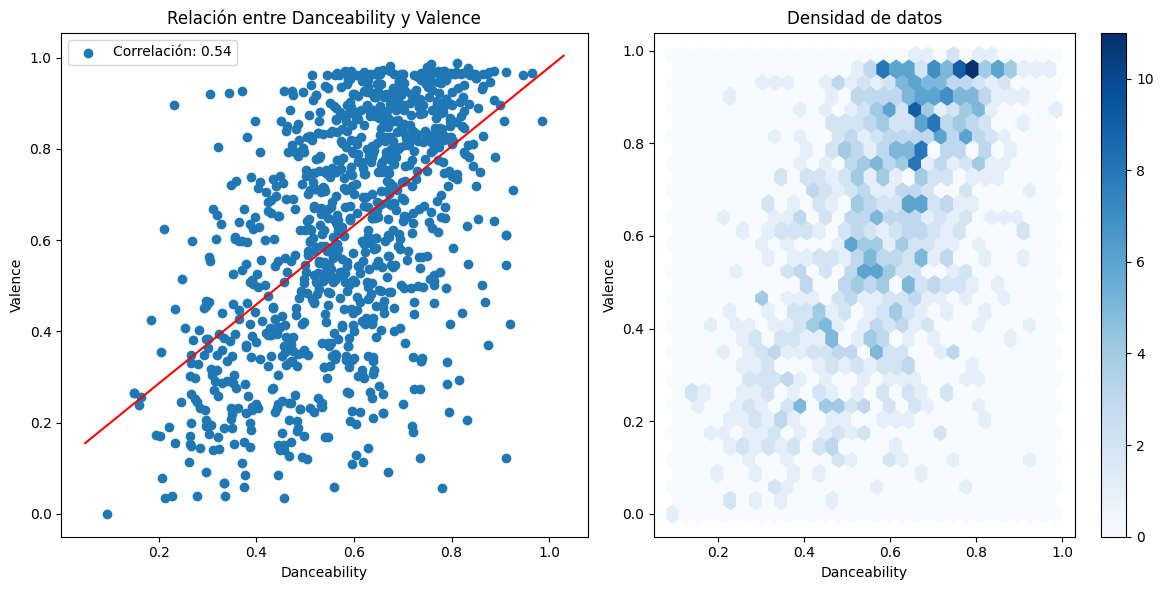

In [41]:
variable1 = 'Danceability'
variable2 = 'Valence'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


#### Correlación Energy - Loudness

La relación que hay entre la medida enérgica de una pista y el volúmen promedio de la misma.

Generamos el Scatter Plot para representar la correlación, el Hexbin Plot para representar la densidad de la correlación y la línea de mejor ajuste para mostrar la relación ideal.

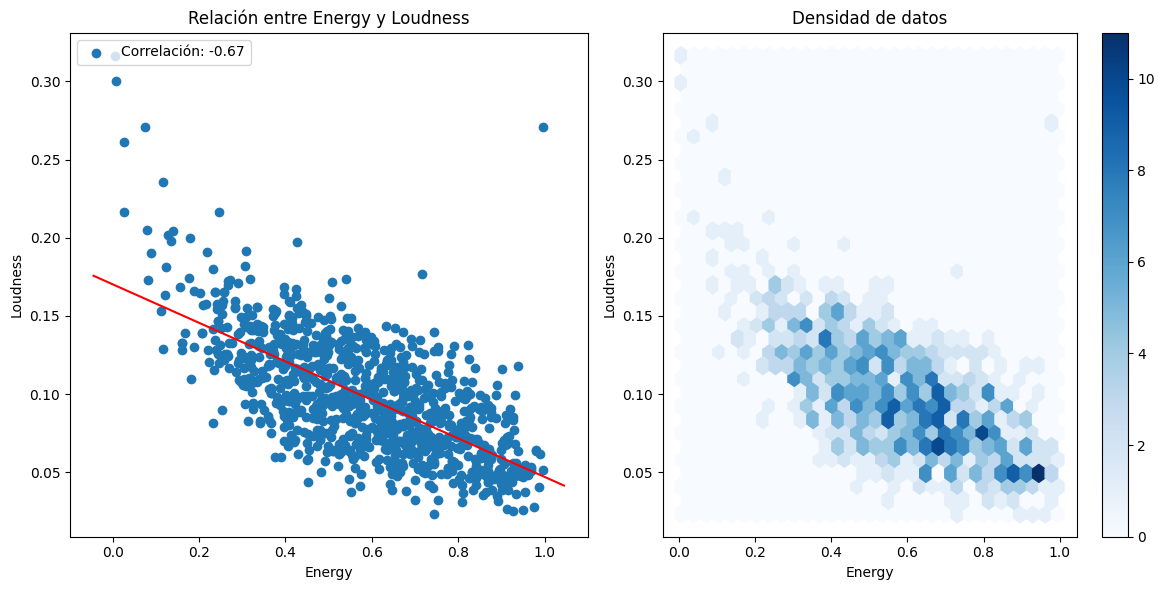

In [42]:
variable1 = 'Energy'
variable2 = 'Loudness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


#### Correlación Energy - Acousticness

Relación que hay entre la medida enérgica de una pista y su calidad acústica o que tan acustica es.

Generamos el Scatter Plot para representar la correlación, el Hexbin Plot para representar la densidad de la correlación y la línea de mejor ajuste para mostrar la relación ideal.

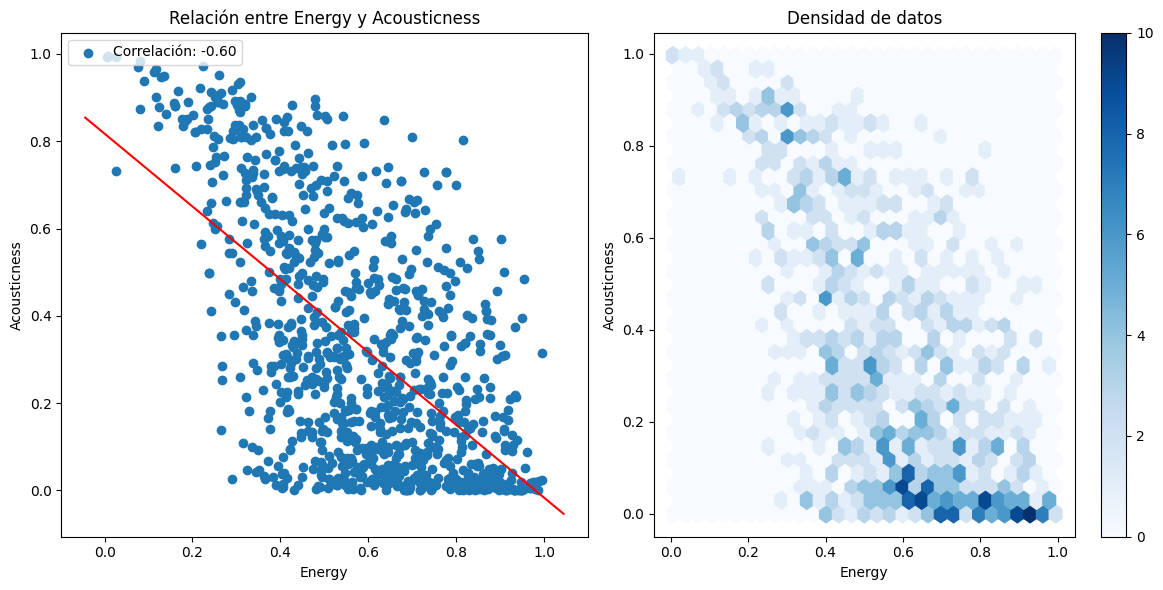

In [43]:
variable1 = 'Energy'
variable2 = 'Acousticness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


#### Correlación Energy - Valence

Relación que hay entre la medida enérgica de una canción y su positivdad musical.

Generamos el Scatter Plot para representar la correlación, el Hexbin Plot para representar la densidad de la correlación y la línea de mejor ajuste para mostrar la relación ideal.

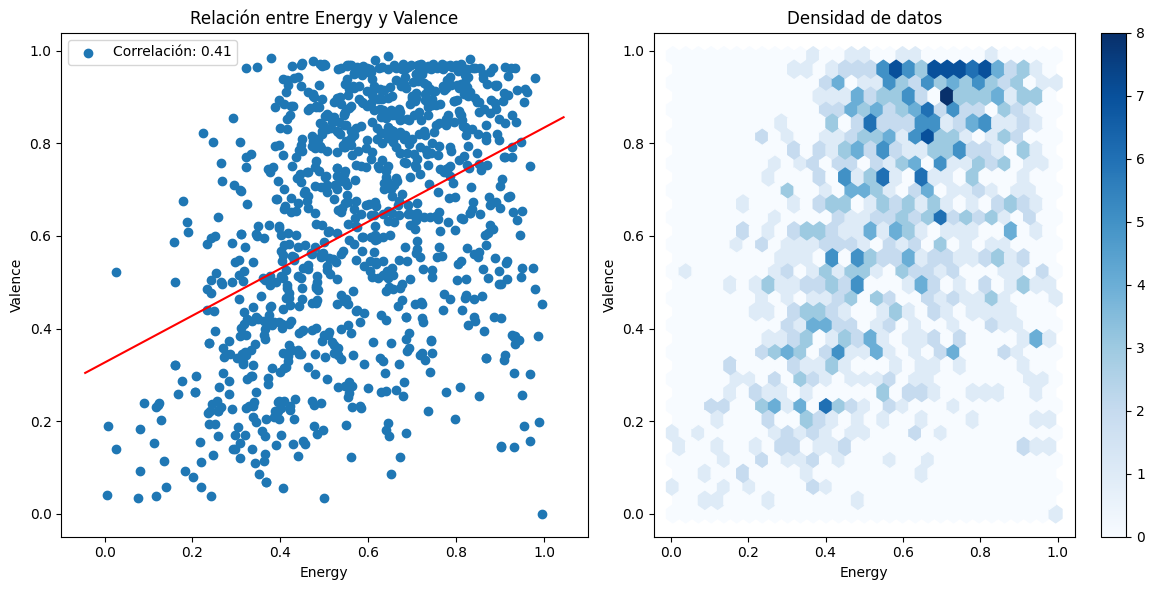

In [44]:
variable1 = 'Energy'
variable2 = 'Valence'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


#### Correlación Loudness - Acousticness

Relación entre el volumen promedio de la cancion y su calidad acústica.

Generamos el Scatter Plot para representar la correlación, el Hexbin Plot para representar la densidad de la correlación y la línea de mejor ajuste para mostrar la relación ideal.

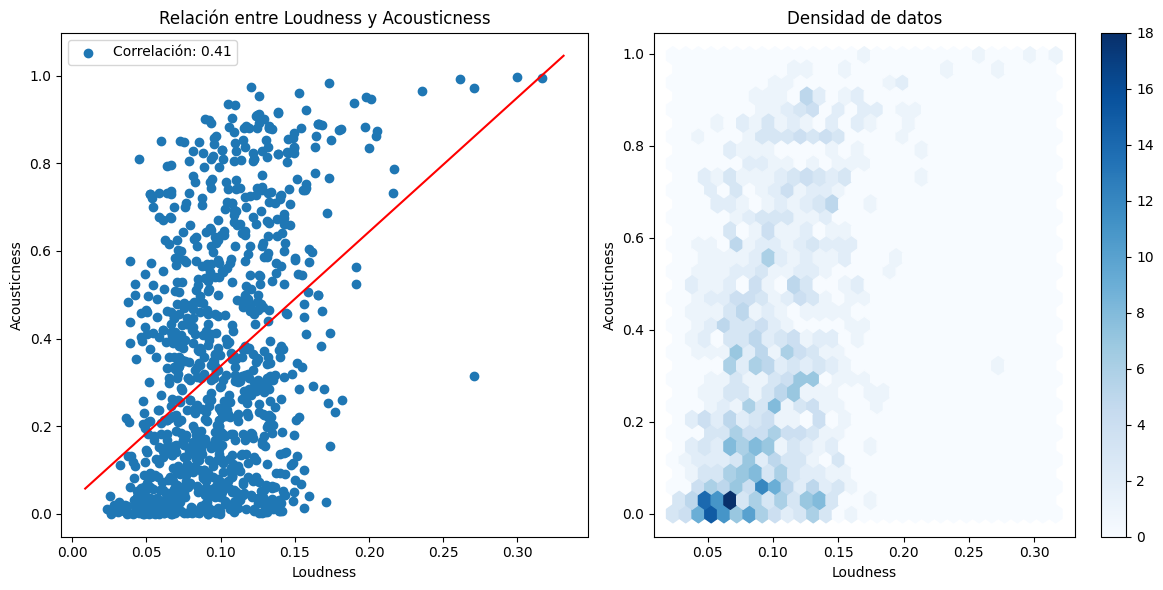

In [45]:
variable1 = 'Loudness'
variable2 = 'Acousticness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


### Clustering

Utilizamos esta técnica para intentar encontrar muestras con características comunes para estudiarlas.

Utilizaremos clustering **basado en particionamiento** y para encontrar el valor de K-Means necesario generamos un **Elbow plot** o gráfico del codo que hace un análisis sobre la cantidad de clusters y la distancia entre las muestras para encontrar el numero óptimo donde la distancia comienza a decrecer lentamente.

#### Elbow plot

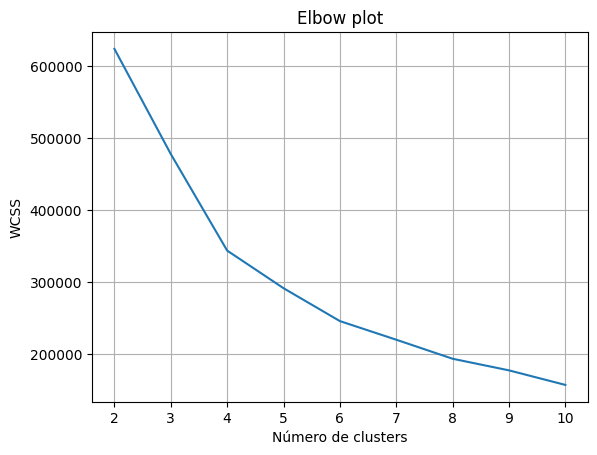

In [46]:
from sklearn.cluster import KMeans

features = covers_sin_track_artist.copy()

# Generacion de todos los valores de K
wcss = [] # Within Cluster Sum of Squares
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Visto el resultado, vamos a realizar una validación de Clustering para saber si las mejores agrupaciones las podemos obtener con un k=4 o k=5.

Utilizamos normalización por rangos usando el valor mínimo y máximo de cada columna.

In [47]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
features = minmaxscaler.fit_transform(features)

#### Validación mediante Coeficiente de Silueta

In [48]:
from sklearn.metrics import silhouette_score

# Supongamos que tienes un conjunto de datos llamado 'features'
# Define los valores de k que quieres evaluar
k_values = [4, 5]  # Ajusta los valores según lo necesario
silhouette_scores = {}  # Almacenar los resultados de Silhouette

# Iteramos sobre los diferentes valores de k
for k in k_values:
    # Aplicamos KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features)
    
    # Calculamos el coeficiente de Silhouette promedio
    score = silhouette_score(features, labels)
    silhouette_scores[k] = score  # Guardamos el resultado

    print(f'Número de clusters: {k}, Coeficiente Silhouette: {score:.4f}')


Número de clusters: 4, Coeficiente Silhouette: 0.1734
Número de clusters: 5, Coeficiente Silhouette: 0.1616


Un K = 4 es nuestra mejor opción.

#### Gráfico

In [49]:
kmeans = KMeans(n_clusters=4, verbose=0, random_state=10) # verbose=0 para no obtener resultados intermedios del entrenamiento del modelo KMeans
# Lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features)
# Obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(features)

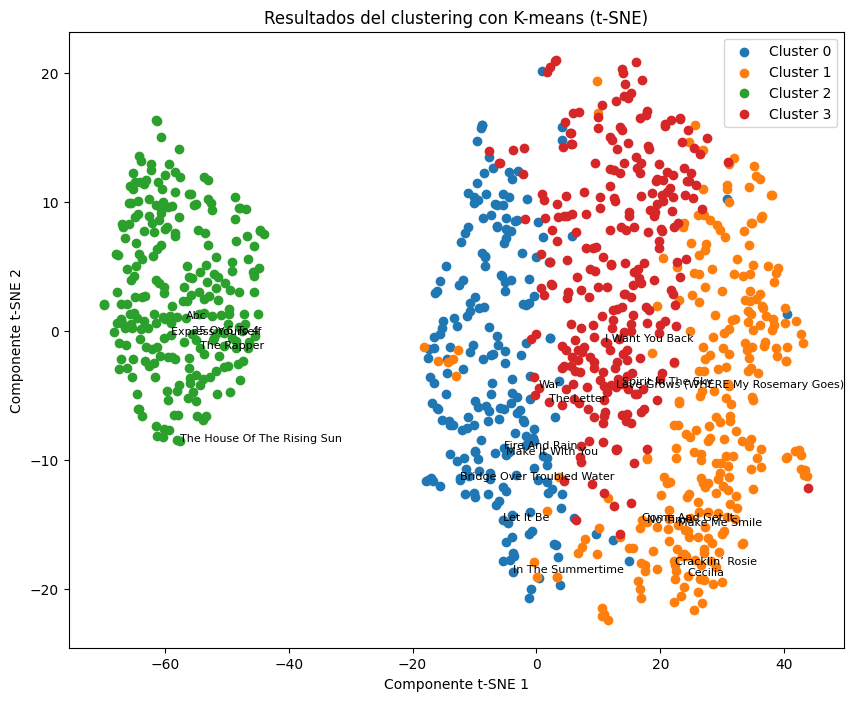

In [50]:
from sklearn.manifold import TSNE

# Utilizaremos la etiqueta del nombre de la canción para identificarlas dentro de los clusters
track = raw_covers['Track']

# Reducimos la dimensionalidad de los datos usando t-SNE
tsne_cluster = TSNE(n_components=2, random_state=42)
tsne_results = tsne_cluster.fit_transform(features)

# Creamos DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Track': track})

# Graficamos los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Obtenemos lita de tracks a marcar en cada cluster
  track_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Track'].tolist()
  
  track_to_label = track_to_label[:5]
  # Marcamos cada track en el grafico
  for track1 in track_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Track'] == track1)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], track1, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

#### Investigación de clusters

Mostramos el contenido de los grupos para estudiarlos y sacar conclusiones.

In [51]:
# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Track': track, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(4):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Track'].tolist())



Cluster 0:
['Let It Be', 'Fire And Rain', 'In The Summertime', 'Make It With You', 'Bridge Over Troubled Water', 'Raindrops Keep Fallin’ On My Head', '(THEY Long To Be) Close To You', 'Leaving On A Jet Plane', 'He Ain’t Heavy, He’s My Brother', 'Easy Come, Easy Go', 'Didn’t I (BLOW Your Mind This Time)', 'Hey There Lonely Girl', 'Holly Holy', 'Reflections Of My Life', 'Patches', 'Love On A Two-Way Street', 'Everything Is Beautiful', 'I Just Can’t Help Believing', 'Julie, Do Ya Love Me', 'Without Love (THERE Is Nothing)', 'Someday We’ll Be Together', 'I’ll Never Fall In Love Again', 'If', 'Your Song', 'Take Me Home, Country Roads', 'Imagine', 'Bridge Over Troubled Water', 'If You Could Read My Mind', 'How Can You Mend A Broken Heart', 'Just My Imagination (RUNNING Away With Me)', 'Rainy Days And Mondays', 'The Night They Drove Old Dixie Down', 'Uncle Albert/Admiral Halsey', 'For All We Know', '(WHERE Do I Begin?) Love Story', 'Help Me Make It Through The Night', 'Does Anybody Really Kn

##### Comparación de variables Continuas

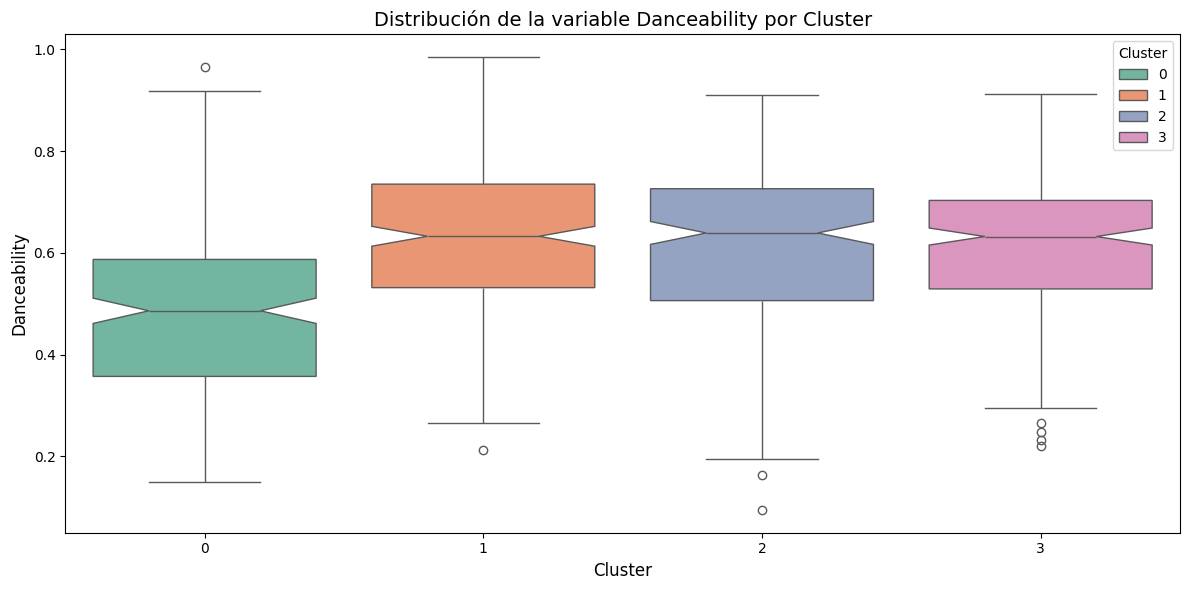

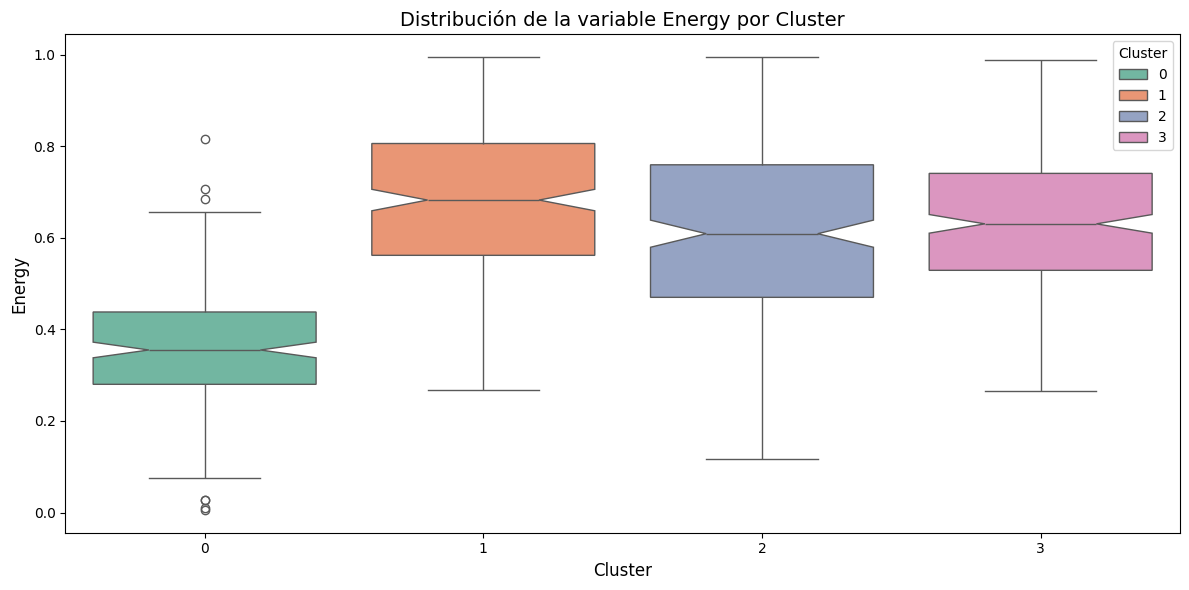

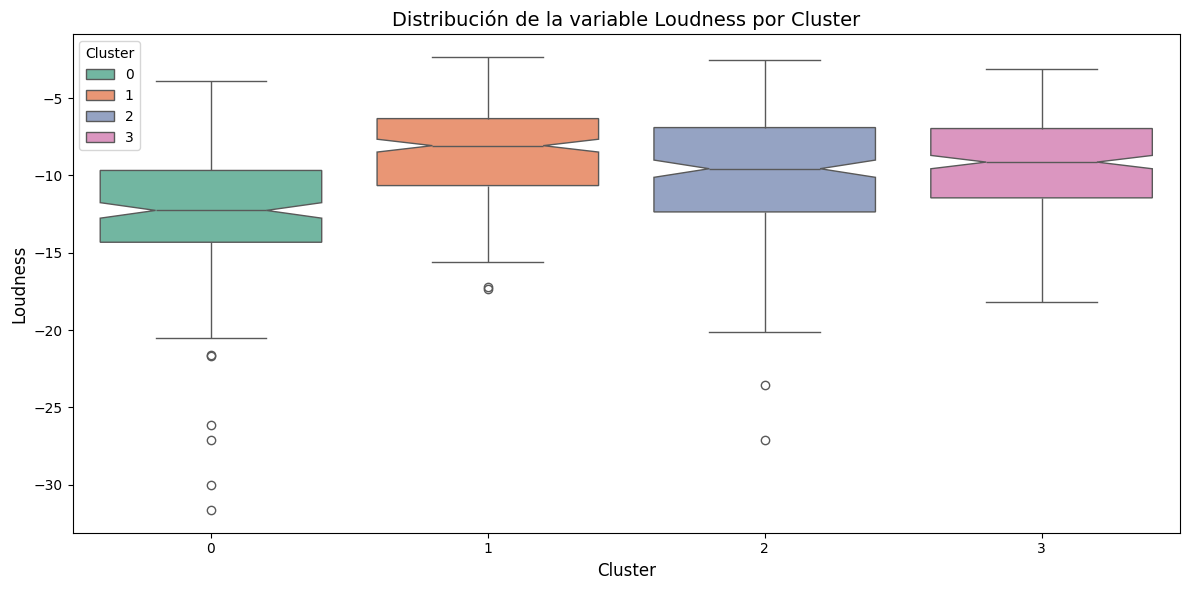

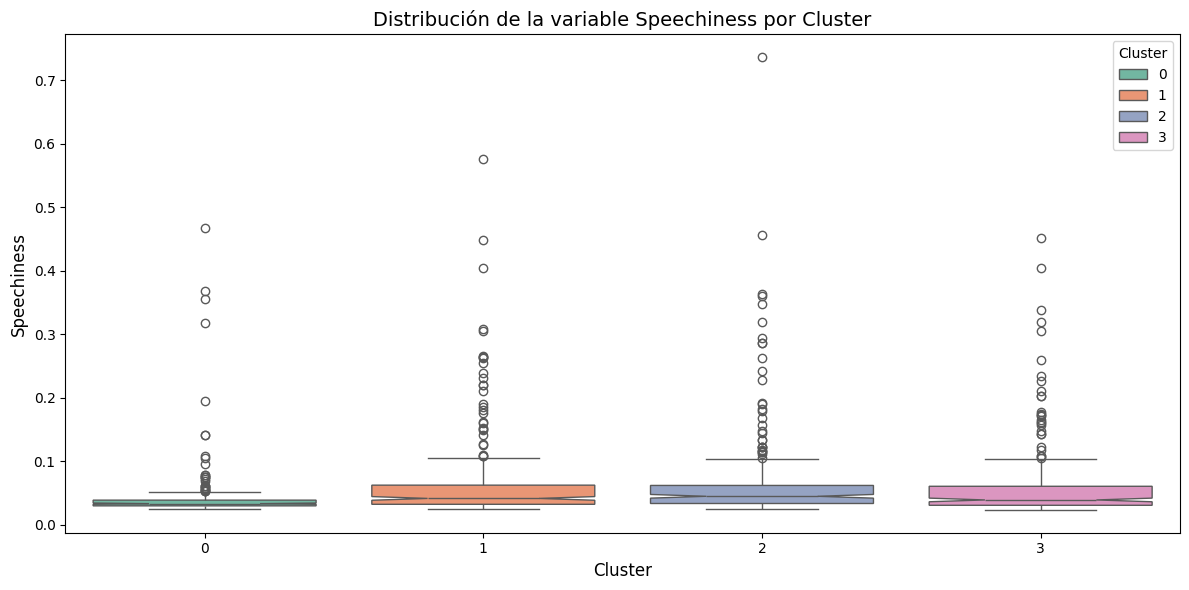

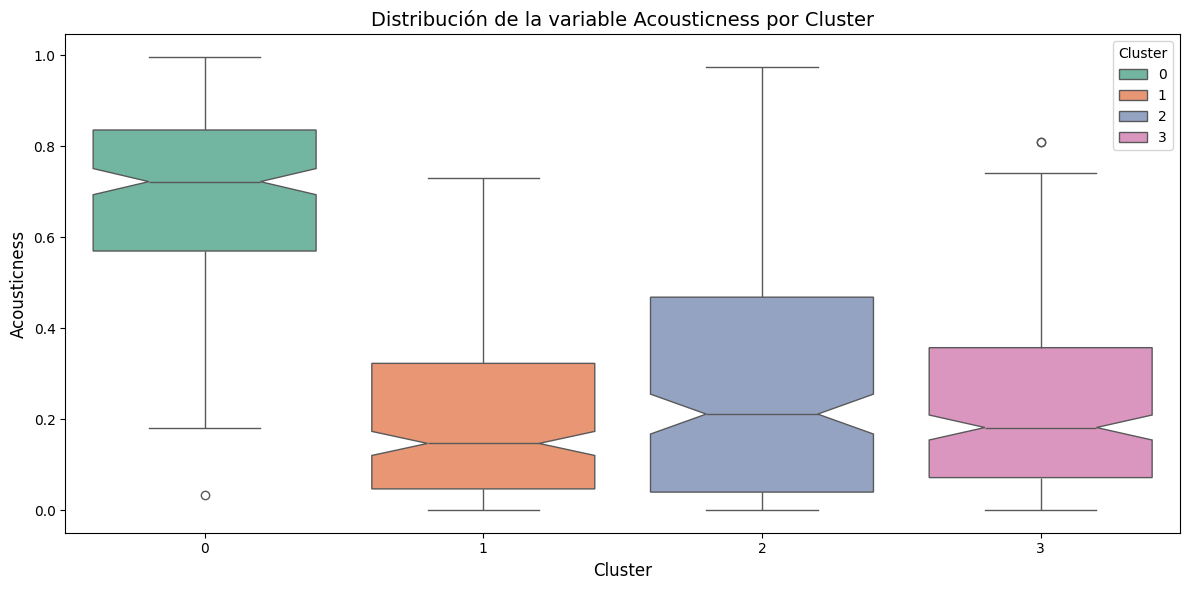

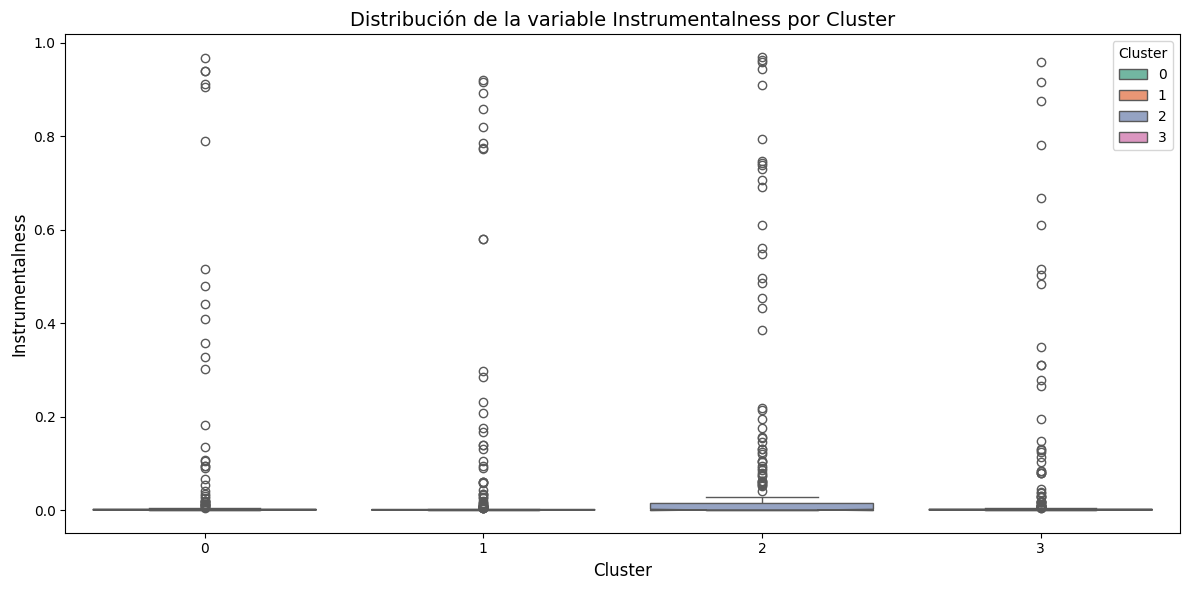

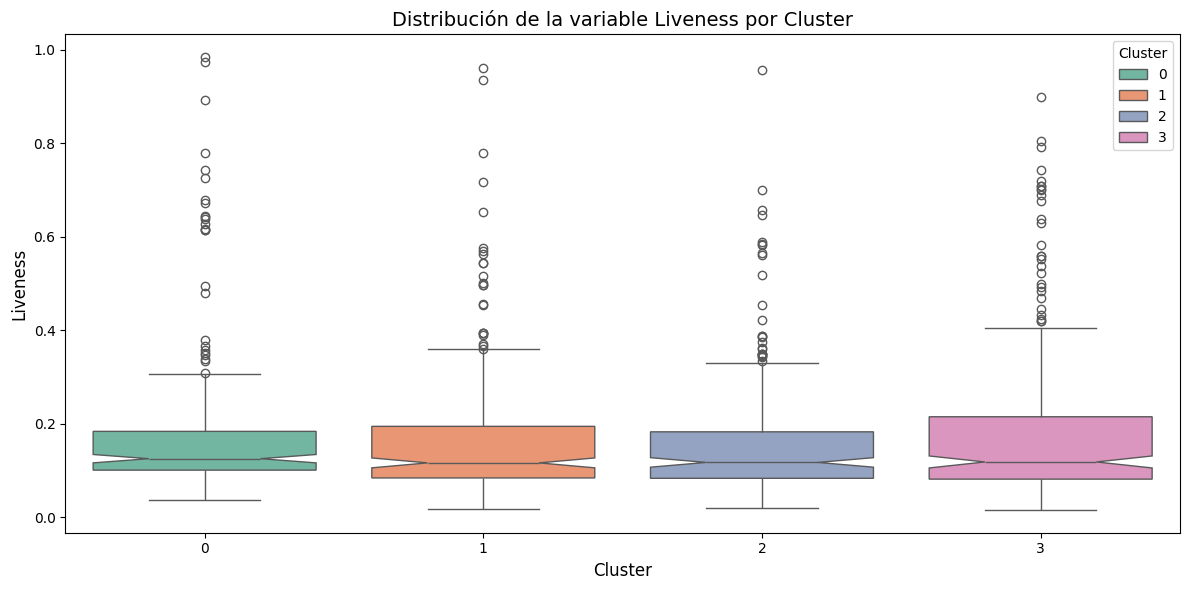

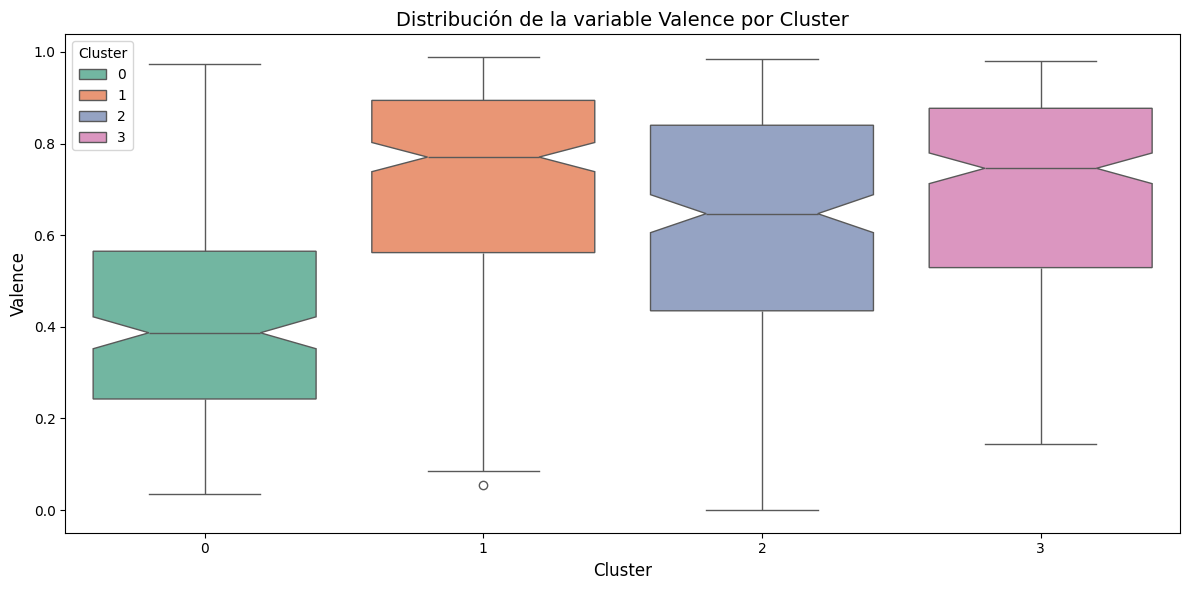

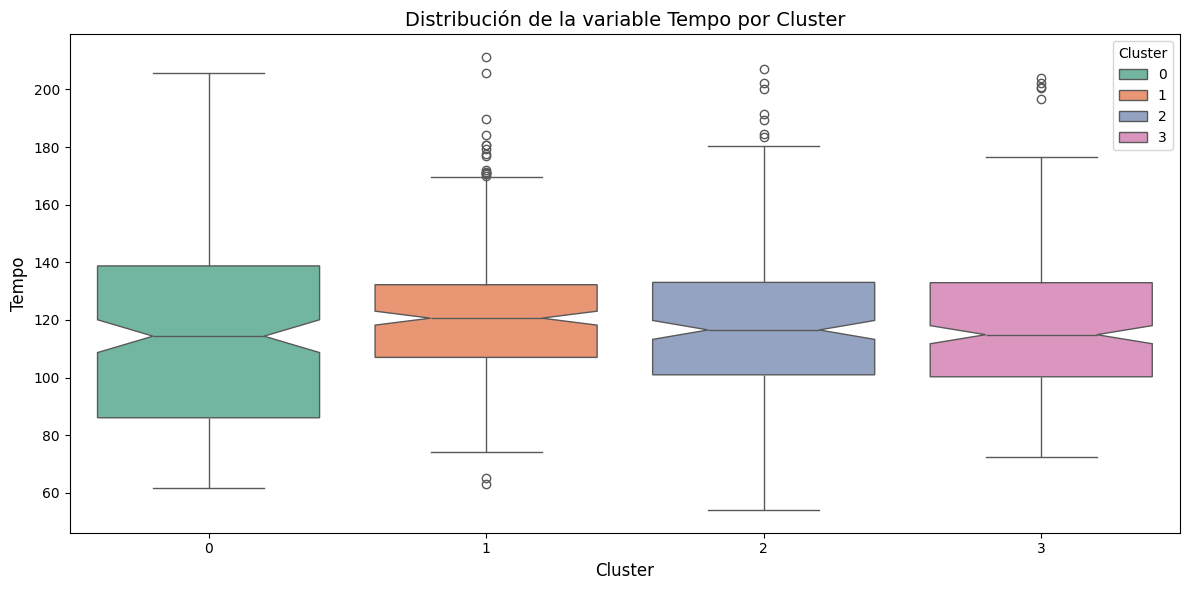

In [52]:
# Separamos variables continuas (float) y categóricas (int)
continuas = [col for col in raw_covers.select_dtypes(include=['float']).columns if col not in ['Cluster', 'Track']]

# Boxplots comparativos de variables continuas
for variable in continuas:
    # Lista para almacenar los datos de cada cluster
    boxplot_data = []

    # Iteramos sobre todos los clusters
    for cluster_num in range(4): 
        cluster_data = raw_covers[raw_covers['Track'].isin(
            cluster_df[cluster_df['Cluster'] == cluster_num]['Track'].tolist()
        )]
        
        # Agregamos todos los datos del cluster a un DataFrame
        boxplot_data.append(pd.DataFrame({
            variable: cluster_data[variable],
            'Cluster': cluster_num  # Asignamos el número del cluster
        }))

    # Combinamos todos los datos en un solo DataFrame
    combined_data = pd.concat(boxplot_data)

    # Graficamos los boxplots para la variable actual por cada cluster
    plt.figure(figsize=(12, 6)) 
    sns.boxplot(data=combined_data, x='Cluster', y=variable, hue='Cluster', palette='Set2', dodge=False, notch=True)

    # Personalizamos el gráfico
    plt.title(f'Distribución de la variable {variable} por Cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(variable, fontsize=12)

    # Mostramos el gráfico
    plt.tight_layout()
    plt.show()


##### Comparación de variables Categóricas

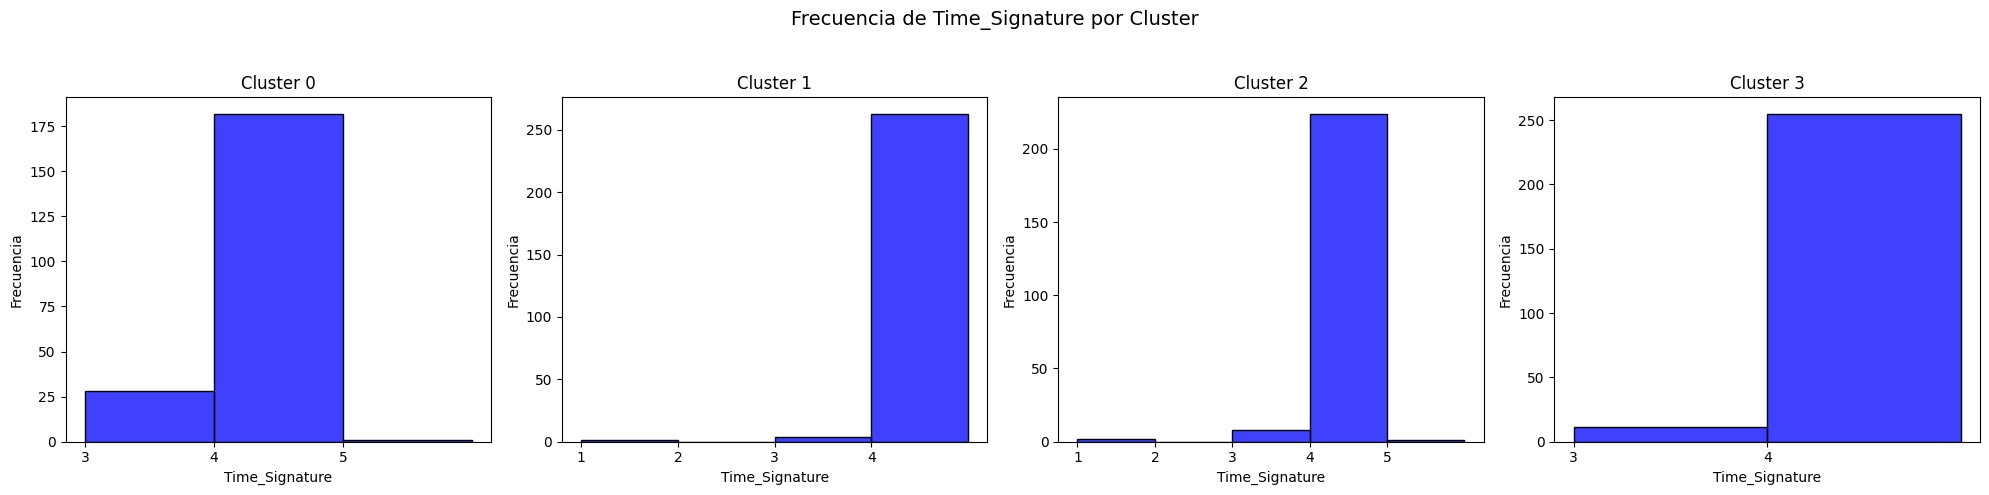

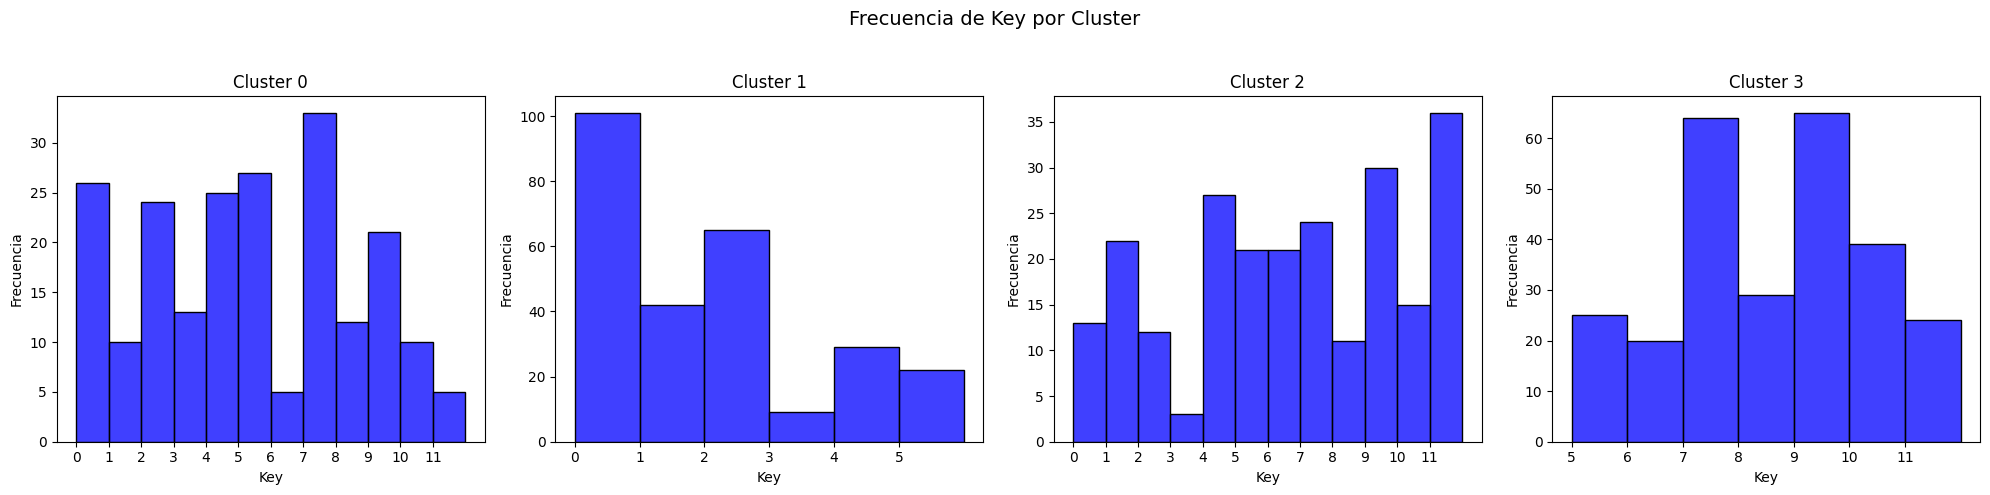

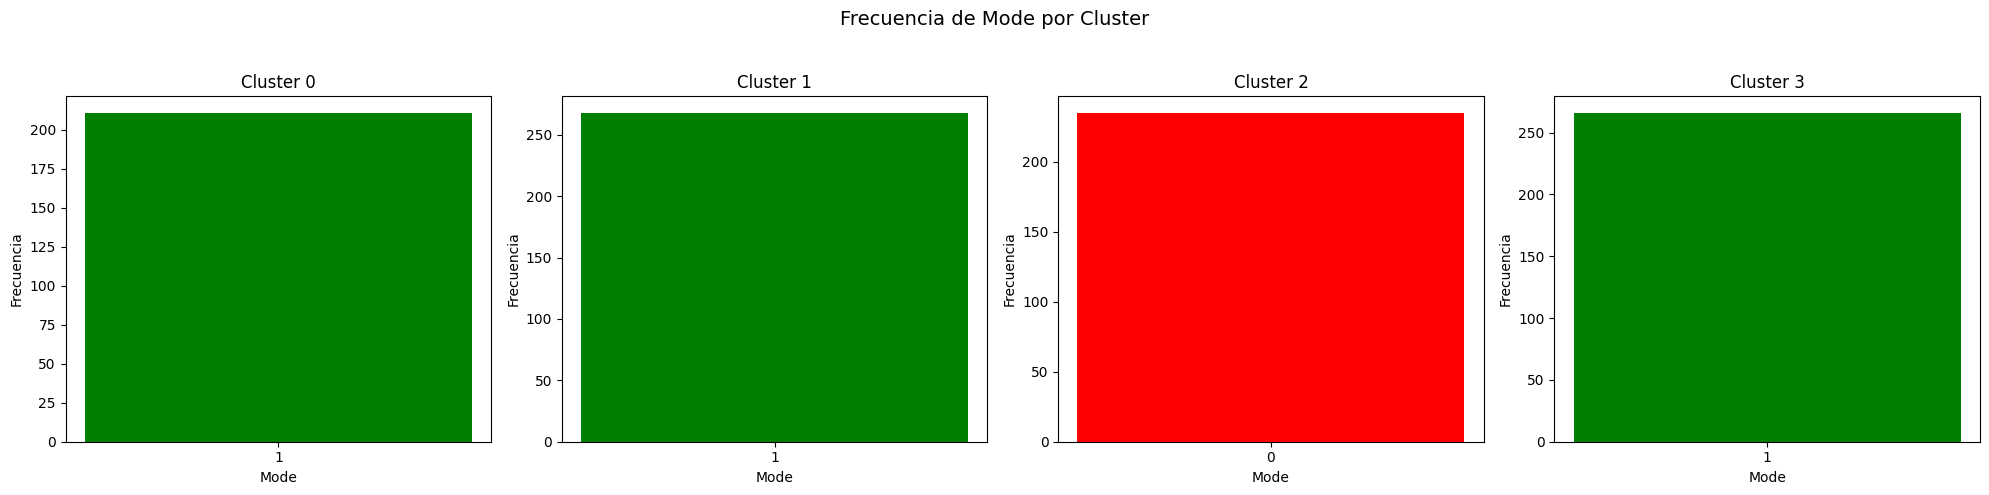

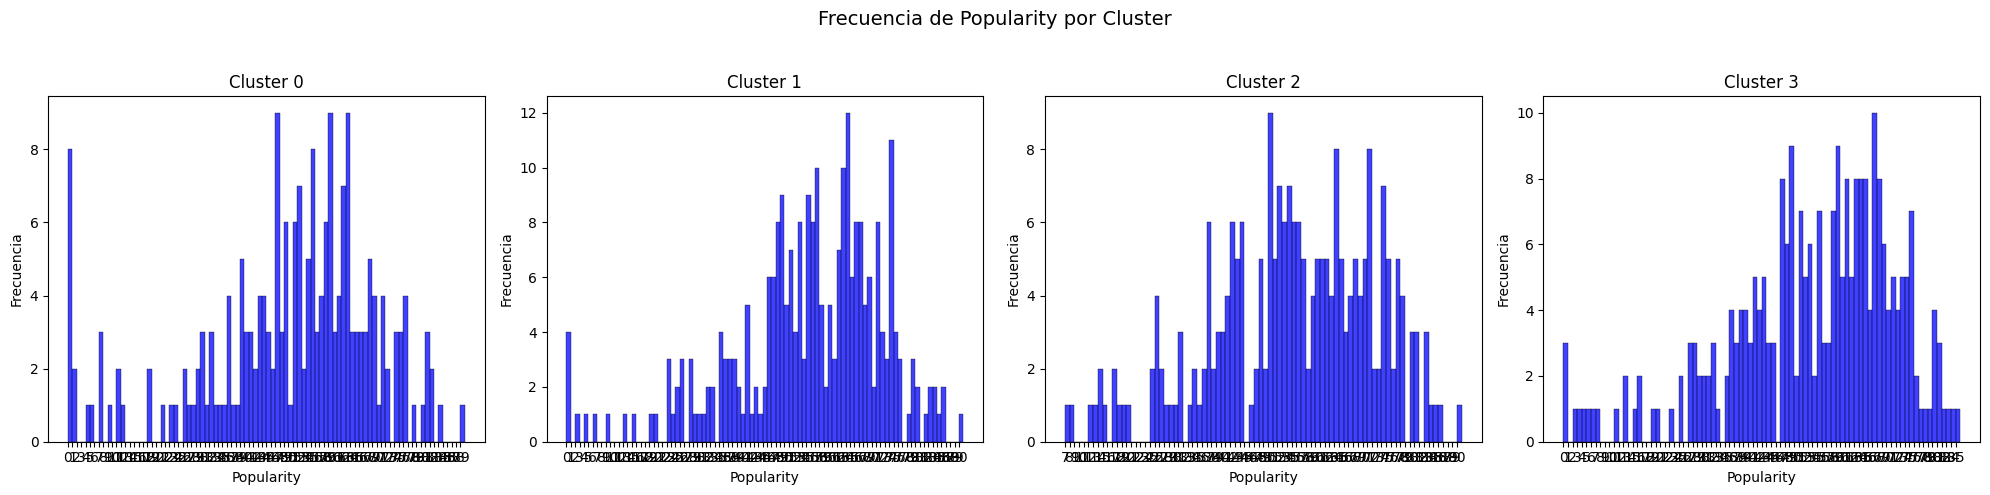

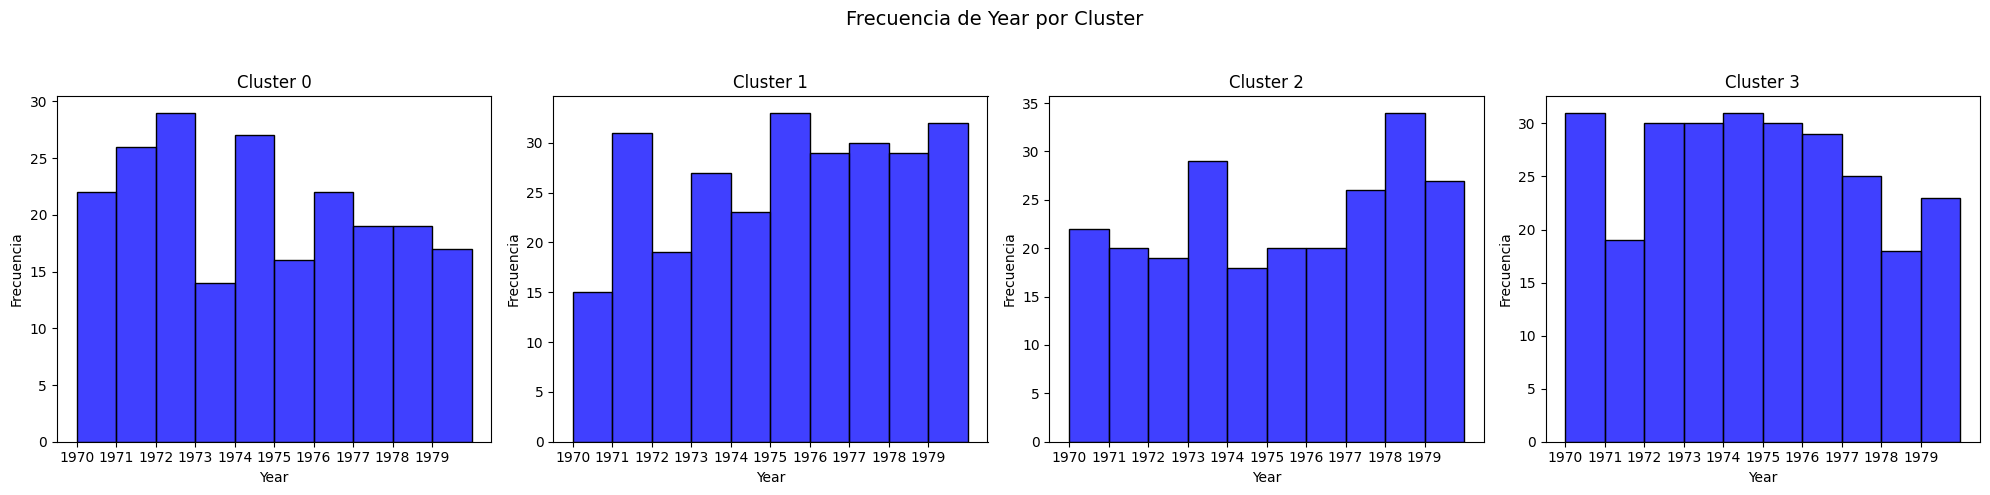

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las variables categóricas
categoricas = [col for col in raw_covers.select_dtypes(include=['int']).columns if col not in ['Cluster', 'Track']]

# Número de clusters
n_clusters = 4

# Iteramos sobre las variables categóricas
for variable in categoricas:
    # Creamos una figura con subgráficos, uno por cluster
    fig, axes = plt.subplots(1, n_clusters, figsize=(n_clusters * 5, 5))
    
    # Iteramos sobre los clusters
    for cluster_num in range(n_clusters):
        # Filtramos los datos del cluster actual
        cluster_data = raw_covers[raw_covers['Track'].isin(
            cluster_df[cluster_df['Cluster'] == cluster_num]['Track'].tolist()
        )]
        
        # Como la variable Mode tiene valores solo 0-1 usamos 2 colores para distinguir mejor las diferencias
        if variable == "Mode":
            # Calculamos las frecuencias
            value_counts = cluster_data[variable].value_counts()
            colors = ['red' if val == 0 else 'green' for val in value_counts.index] # Rojo (Mode=0) y Verde (Mode=1)
            
            # Histograma personalizado
            axes[cluster_num].bar(
                value_counts.index, 
                value_counts.values, 
                color=colors
            )
        else:
            # Histograma normal para el resto de variables
            sns.histplot(
                cluster_data[variable], 
                kde=False, 
                bins=range(cluster_data[variable].min(), cluster_data[variable].max() + 2),  # Para valores enteros
                ax=axes[cluster_num], 
                color='blue'
            )
        
        # Configuramos títulos y etiquetas del subgráfico
        axes[cluster_num].set_title(f'Cluster {cluster_num}', fontsize=12)
        axes[cluster_num].set_xlabel(variable, fontsize=10)
        axes[cluster_num].set_ylabel('Frecuencia', fontsize=10)
        axes[cluster_num].set_xticks(range(cluster_data[variable].min(), cluster_data[variable].max() + 1))  # Etiquetas enteras

    # Título general de la figura
    fig.suptitle(f'Frecuencia de {variable} por Cluster', fontsize=14)
    
    # Ajustamos el diseño
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Espacio para el título general
    
    # Mostramos la figura
    plt.show()


## Planteamiento de hipótesis

* La medida que indica el número de pulsaciones por compás deberia estar directamente relacionada con el ritmo de la pista medida en pulsaciones por minuto que a su vez quizás esta relacionada con la intensidad de la canción. A mayor pulsaciones por compás, mayor deben ser las pulsaciones por minuto,  y mayor actividad: **Time_signature - Tempo - Energy**.

* Si una canciön es muy adecuada para bailarla, tenderá a ser mas alegre: **Danceability - Valence**.

* Una canción con un volumen muy elevado, suponemos que deberia ser mas enérgica: **Loudness - Energy**.

* Si una pista tiene muchas probabilidades de haber sido interpretada en vivo, entonces seguramente tenga un volumen elevado: **Liveness - Loudness**.

* A su vez, si una canción tiene una popularidad alta, es muy probable que se haya interpretado en vivo o viceversa: **Popularity - Liveness**.

* Las canciones mas adecuadas para bailar deben ser mas populares que otras: **Danceability - Popularity**.

* Una pista muy instrumental deberia tener valores directamente opuestos de cantidad de palabras habladas y viceversa: **Instrumentalness - Speechiness**. 

* La popularidad de una canción está conformada por una serie de características comunes que eran de buen gusto multitudinario en la época de los años 70.

## Validación de hipótesis

### Hipótesis 1

In [54]:
import scipy.stats as stats

copiah2 = raw_covers.copy()
copiah2['Danceability'] = copiah2['Danceability'].apply(lambda x:1 if x > 0.5 else 0)
copiah2 = copiah2.rename(columns={'Danceability': 'Bailable', 'Valence': 'Positividad'})
copiah2[['Track', 'Artist', 'Positividad', 'Bailable']]

,Track,Artist,Positividad,Bailable
0,Abc,The Jackson 5,0.860,1
1,Let It Be,The Beatles,0.410,0
2,I Want You Back,The Jackson 5,0.885,0
3,Cecilia,Simon & Garfunkel,0.954,1
4,Spirit In The Sky,Norman Greenbaum,0.543,1
...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,0.837,1
976,Don’t Cry Out Loud,Melissa Manchester,0.193,0
977,When You’re In Love With A Beautiful Woman,Dr. Hook,0.792,1
978,I’ll Never Love This Way Again,Dionne Warwick,0.247,0


#### Validamos normalidad

In [55]:
from scipy.stats import shapiro

# Generamos los grupos de las canciones bailables y no bailables
canciones_bailables = copiah2[copiah2['Bailable'] == 1]['Positividad']
canciones_nobailables = copiah2[copiah2['Bailable'] == 0]['Positividad']

# Test de Shapiro-Wilk para canciones bailables
stat, p = shapiro(canciones_bailables)
print(f"Test de Shapiro-Wilk para canciones bailables: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones no bailables
stat, p = shapiro(canciones_nobailables)
print(f"Test de Shapiro-Wilk para canciones no bailables: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones bailables: Estadístico=0.933, p-valor=0.000
Test de Shapiro-Wilk para canciones no bailables: Estadístico=0.964, p-valor=0.000


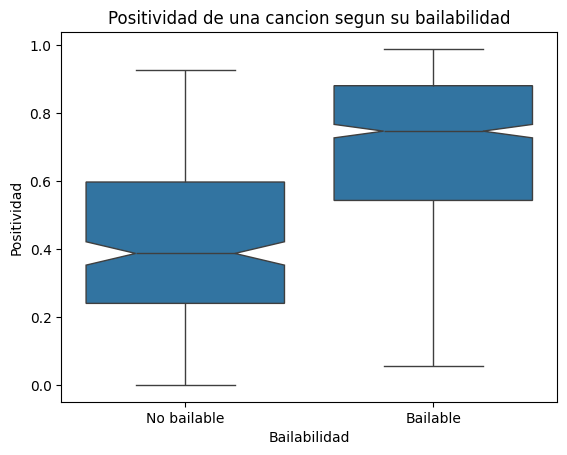

In [56]:
sns.boxplot(x='Bailable', y='Positividad', data=copiah2, notch=True)
plt.title("Positividad de una cancion segun su bailabilidad")
plt.xlabel("Bailabilidad")
plt.xticks(ticks=[0, 1], labels=["No bailable", "Bailable"])
plt.ylabel("Positividad")
plt.show()

#### Validamos homocedasticidad

In [57]:
stat, p = stats.levene(canciones_bailables, canciones_nobailables)
print(f"Test de Levene para positividad musical: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para positividad musical: Estadístico=0.088, p-valor=0.767


#### Significancia estadística

In [58]:
stat, p = stats.mannwhitneyu(canciones_bailables, canciones_nobailables)
print(f"Test de Mann Whitney U para positividad musical: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Mann Whitney U para positividad musical: Estadístico=153004.000, p-valor=0.000


#### Respuesta

In [59]:
stat, p = stats.mannwhitneyu(canciones_bailables, canciones_nobailables, alternative='greater')

if p >= 0.05:
    print(f"Se aprueba la hipótesis nula con un p-valor = {p:.3f})")
else:
    print(f"Se rechaza la hipótesis nula y se aprueba la alternativa con un p-valor = {p})")

Se rechaza la hipótesis nula y se aprueba la alternativa con un p-valor = 2.064869822831447e-49)


**Se rechaza la hipótesis nula y se aprueba la alternativa.**

### Hipótesis 2

El volúmen de una canción y su calidad acústica podrán determinar su nivel de intensidad y actividad?

In [111]:
copiah3 = covers_sin_track_artist[['Loudness','Acousticness']].copy()

#### Scatter Plot

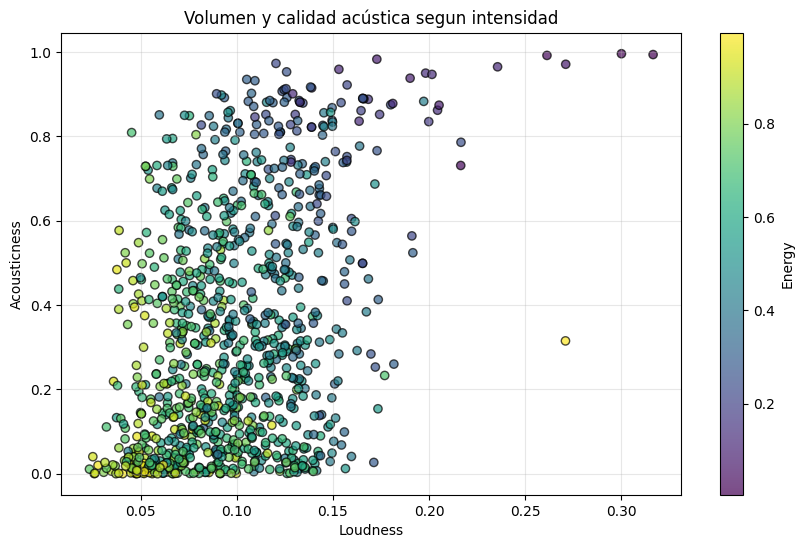

In [118]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    copiah3['Loudness'],               # Eje X
    copiah3['Acousticness'],           # Eje Y
    c=raw_covers['Energy'],  # Color basado en Energy
    cmap='viridis',                    # Mapa de color
    alpha=0.7,                         # Transparencia de los puntos
    edgecolor='k'                      # Borde de los puntos
)

cbar = plt.colorbar(scatter)
cbar.set_label('Energy')

plt.xlabel('Loudness')
plt.ylabel('Acousticness')
plt.title('Volumen y calidad acústica segun intensidad')
plt.grid(alpha=0.3)

plt.show()


#### Regresión Lineal Multiple

In [99]:
from sklearn.preprocessing import StandardScaler

# Estandarizamos los datos
scaler = StandardScaler()
copiah3_stand = scaler.fit_transform(copiah3)

# Metamoslo en un dataframe así no perdemos los nombres de las columnas
copiah3_stand_df = pd.DataFrame(copiah3_stand, columns=copiah3.columns)

# Imprimir las medias y desviaciones estándar antes del escalado
print("Medias y desviaciones estándar antes del escalado:")
print(copiah3.describe().loc[['mean', 'std']])

# Imprimir las medias y desviaciones estándar después del escalado
print("\nMedias y desviaciones estándar después del escalado:")
print(pd.DataFrame(copiah3_stand_df).describe().loc[['mean', 'std']])

Medias y desviaciones estándar antes del escalado:
      Loudness  Acousticness
mean  0.098639      0.332959
std   0.037184      0.280076

Medias y desviaciones estándar después del escalado:
          Loudness  Acousticness
mean  1.740105e-16  1.160070e-16
std   1.000511e+00  1.000511e+00


In [100]:
import statsmodels.api as sm

y = raw_covers['Energy']
# Agregamos una constante como característica, para estimar la ordenada al origen
const = sm.add_constant(copiah3_stand_df)
# Ajustamos el modelo
model = sm.OLS(y, const).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     675.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          5.51e-185
Time:                        00:02:27   Log-Likelihood:                 601.18
No. Observations:                 980   AIC:                            -1196.
Df Residuals:                     977   BIC:                            -1182.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5809      0.004    138.575   

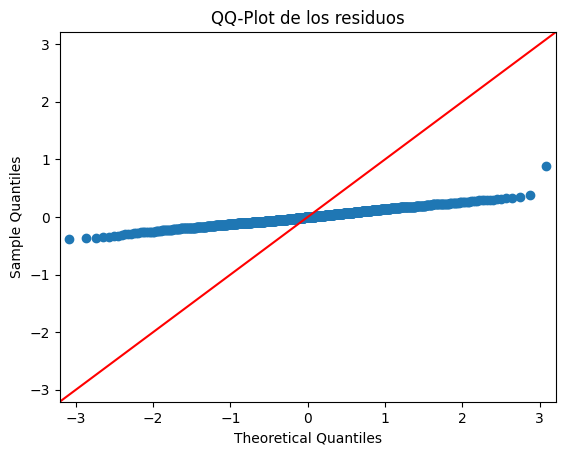

In [101]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

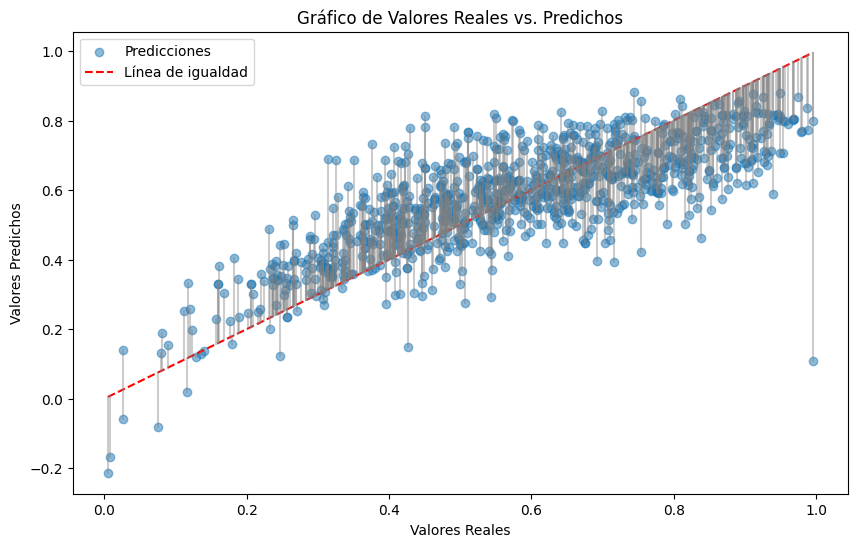

In [102]:
# Obtenemos los valores predichos y los valores reales
y_pred = model.fittedvalues
y_real = y

# Graficamos los valores predichos vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_real, y_pred, alpha=0.5, label='Predicciones')
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], color='red', linestyle='--', label='Línea de igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de Valores Reales vs. Predichos')

# Agregamos líneas de error para cada punto
for i in range(len(y_real)):
    plt.plot([y_real[i], y_real[i]], [y_real[i], y_pred[i]], color='gray', alpha=0.4)

plt.legend()
plt.show()

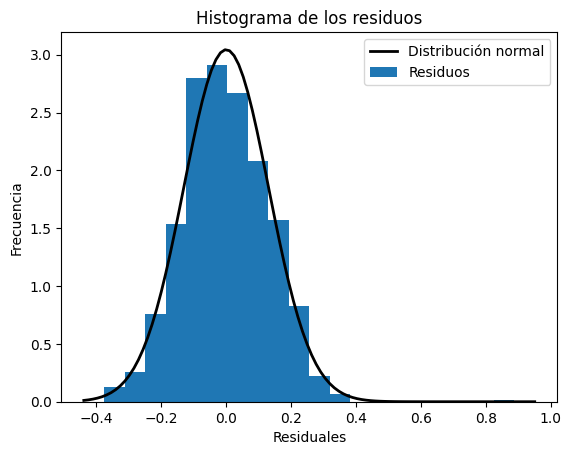

In [104]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()


### Hipótesis 3

Probabilidad de que una pista se haya interpretado en vivo respecto de su valor de popularidad (en nuestra muestra).

In [61]:
copiah5 = raw_covers.copy()
copiah5['Popularity'] = copiah2['Popularity'].apply(lambda x:1 if x > 50 else 0)
copiah5 = copiah5.rename(columns={'Popularity': 'Popular'})
copiah5[['Track', 'Artist', 'Liveness', 'Popular']]

,Track,Artist,Liveness,Popular
0,Abc,The Jackson 5,0.1900,1
1,Let It Be,The Beatles,0.1110,1
2,I Want You Back,The Jackson 5,0.3700,1
3,Cecilia,Simon & Garfunkel,0.2200,1
4,Spirit In The Sky,Norman Greenbaum,0.1180,1
...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,0.0901,0
976,Don’t Cry Out Loud,Melissa Manchester,0.1270,0
977,When You’re In Love With A Beautiful Woman,Dr. Hook,0.1570,0
978,I’ll Never Love This Way Again,Dionne Warwick,0.1650,0


#### Boxplot comparativo

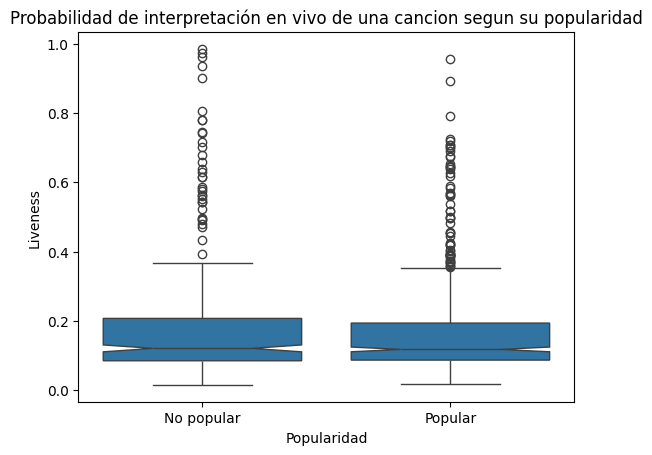

In [62]:
sns.boxplot(x='Popular', y='Liveness', data=copiah5, notch=True)
plt.title("Probabilidad de interpretación en vivo de una cancion segun su popularidad")
plt.xlabel("Popularidad")
plt.xticks(ticks=[0, 1], labels=["No popular", "Popular"])
plt.ylabel("Liveness")
plt.show()

#### Validamos normalidad

In [63]:
from scipy.stats import shapiro

# Generamos los grupos de las canciones populares y no populares
canciones_populares = copiah5[copiah5['Popular'] == 1]['Liveness']
canciones_nopopulares = copiah5[copiah5['Popular'] == 0]['Liveness']

# Test de Shapiro-Wilk para canciones populares
stat, p = shapiro(canciones_populares)
print(f"Test de Shapiro-Wilk para canciones populares: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones no populares
stat, p = shapiro(canciones_nopopulares)
print(f"Test de Shapiro-Wilk para canciones no populares: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones populares: Estadístico=0.738, p-valor=0.000
Test de Shapiro-Wilk para canciones no populares: Estadístico=0.715, p-valor=0.000


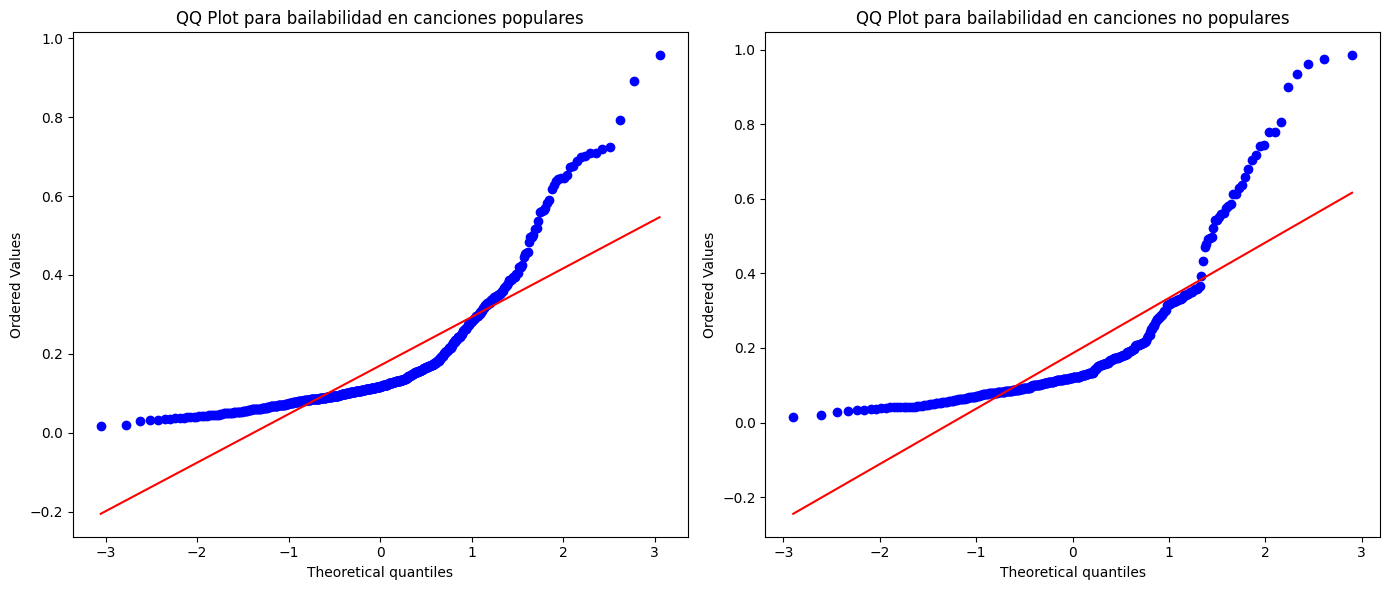

In [64]:
import scipy.stats as stats

# Crear una figura con dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# QQ plot para canciones populares
stats.probplot(canciones_populares, dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot para bailabilidad en canciones populares")

# QQ plot para canciones no populares
stats.probplot(canciones_nopopulares, dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot para bailabilidad en canciones no populares")

# Mostrar la figura
plt.tight_layout()
plt.show()

#### Validamos homocedasticidad

In [65]:
stat, p = stats.levene(canciones_populares, canciones_nopopulares)
print(f"Test de Levene para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Liveness: Estadístico=3.425, p-valor=0.065


#### Test

In [66]:
stat, p = stats.mannwhitneyu(canciones_populares, canciones_nopopulares)
print(f"Test de Mann Whitney U para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Mann Whitney U para Liveness: Estadístico=110799.500, p-valor=0.633


#### Respuesta

Al obtener un p-valor mucho mayor al nivel de significancia 0.05 en nuestro test no paramétrico, no tenemos evidencia que refute la hipótesis nula del test, por lo tanto no tenemos significancia estadística entre los grupos. Entonces se rechaza nuestra hipótesis inicial.

### Hipótesis 4

#### Test Paramétrico

Queremos validar la hipótesis de que las canciones mas adecuadas para ser bailadas tienen una tendencia a tener un buen nivel de popularidad.

Renombramos la variable Danceability por "Bailabilidad" y a la variable Popularity la renombramos a "Popular" y sus valores serán 0 o 1 dependiendo si Popularity es mayor a 50 o no.

In [ ]:
copia_test = raw_covers.copy()
copia_test['Popularity'] = copia_test['Popularity'].apply(lambda x:1 if x > 50 else 0)
copia_test = copia_test.rename(columns={'Danceability': 'Bailabilidad', 'Popularity': 'Popular'})
copia_test[['Track', 'Artist', 'Bailabilidad', 'Popular']]

,Track,Artist,Bailabilidad,Popular
0,Abc,The Jackson 5,0.682,1
1,Let It Be,The Beatles,0.443,1
2,I Want You Back,The Jackson 5,0.469,1
3,Cecilia,Simon & Garfunkel,0.755,1
4,Spirit In The Sky,Norman Greenbaum,0.609,1
...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,0.700,0
976,Don’t Cry Out Loud,Melissa Manchester,0.298,0
977,When You’re In Love With A Beautiful Woman,Dr. Hook,0.665,0
978,I’ll Never Love This Way Again,Dionne Warwick,0.452,0


Generamos el boxplot para observar las distribuciones de ambas categorías.

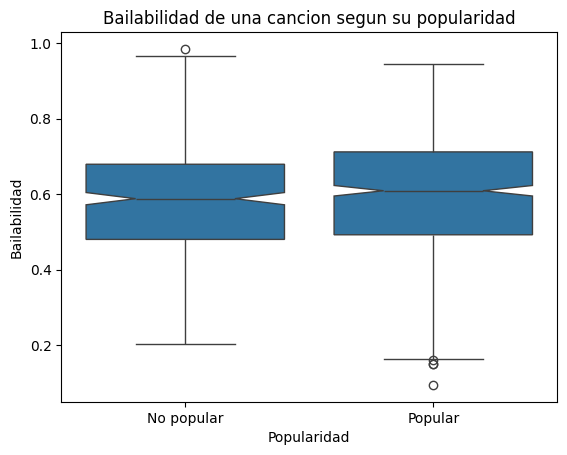

In [ ]:
sns.boxplot(x='Popular', y='Bailabilidad', data=copia_test, notch=True)
plt.title("Bailabilidad de una cancion segun su popularidad")
plt.xlabel("Popularidad")
plt.xticks(ticks=[0, 1], labels=["No popular", "Popular"])
plt.ylabel("Bailabilidad")
plt.show()

##### Normalidad

Vamos a validar la normalidad de los datos usando el test de **Shapiro-Wilk** donde la hipótesis nula es la normalidad de los datos, asique si el p-valor que obtenemos es menor al nivel de confianza α=0.05 estaremos ante datos que no respetan una distribución normal y tenemos que utilizar Tests No Paramétricos para validar nuestra hipótesis.

In [ ]:
from scipy.stats import shapiro

# Generamos los grupos de las canciones populares y no populares
canciones_populares = copia_test[copia_test['Popular'] == 1]['Bailabilidad']
canciones_nopopulares = copia_test[copia_test['Popular'] == 0]['Bailabilidad']

# Test de Shapiro-Wilk para canciones populares
stat, p = shapiro(canciones_populares)
print(f"Test de Shapiro-Wilk para canciones populares: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones no populares
stat, p = shapiro(canciones_nopopulares)
print(f"Test de Shapiro-Wilk para canciones no populares: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones populares: Estadístico=0.986, p-valor=0.000
Test de Shapiro-Wilk para canciones no populares: Estadístico=0.986, p-valor=0.001


Si bien ya comprobamos que no tenemos normalidad en nuestros datos vamos a realizar un QQ-Plot para visualizar como se comportan los datos de los dos grupos respecto de una distribución teórica perfecta.

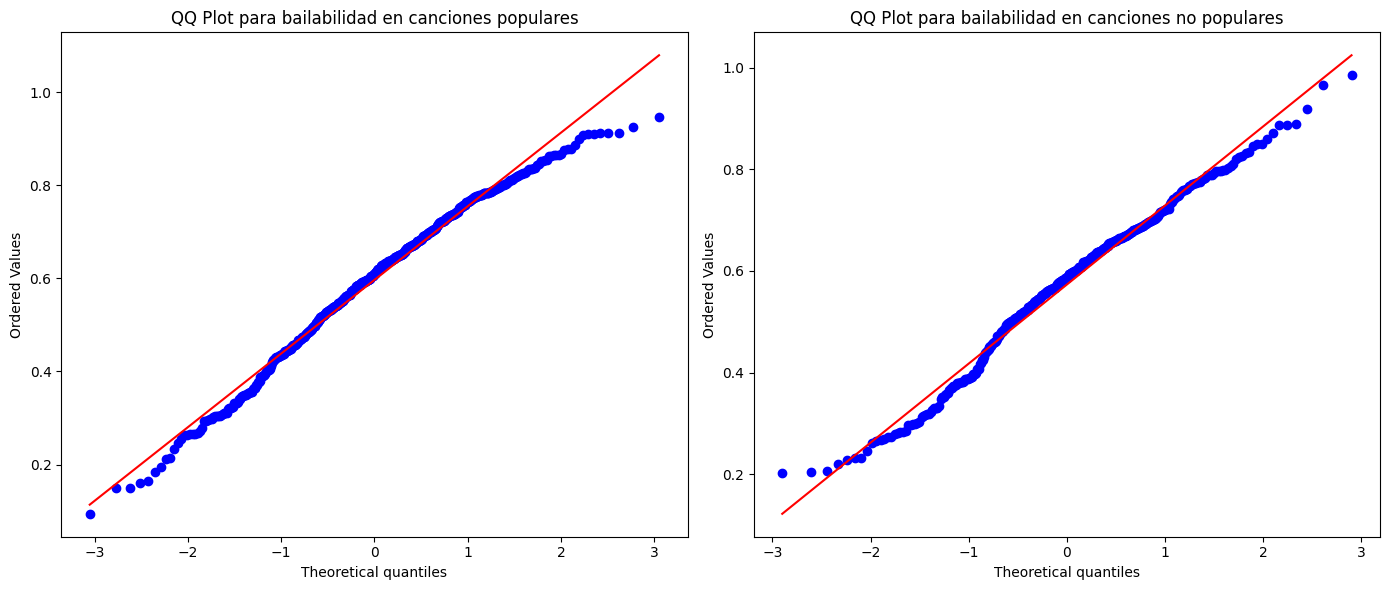

In [ ]:
import scipy.stats as stats

# Crear una figura con dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# QQ plot para canciones populares
stats.probplot(canciones_populares, dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot para bailabilidad en canciones populares")

# QQ plot para canciones no populares
stats.probplot(canciones_nopopulares, dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot para bailabilidad en canciones no populares")

# Mostrar la figura
plt.tight_layout()
plt.show()

##### Homocedasticidad

Utilizaremos el **test de Levene** para validar la homogeneidad de varianzas donde la hipótesis nula es que las varianzas de los grupos son aproximadamente iguales, por lo que para estar en condiciones de realizar un test paramétrico, debemos obtener un p-valor mayor a 0.05.

In [ ]:
stat, p = stats.levene(canciones_populares, canciones_nopopulares)
print(f"Test de Levene para bailabilidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para bailabilidad: Estadístico=0.239, p-valor=0.625


Obtuvimos un p-valor mayor al 0.05 por lo que tenemos homocedasticidad en nuestros datos, pero por lo que comprobamos antes no tenemos normalidad, por lo que no podemos realizar ningún test paramétrico.

#### Test No Paramétrico

##### Mann Whitney U

Tenemos que recurrir a métodos como este al tener datos que no siguen una distribución normal, pero si son homocedásticos. Tambien es preferible ante presencia de valores atípicos como nos sucede con las canciones populares.

**La hipótesis nula de este test es que no hay significancia estadística entre los grupos estudiados.**

In [ ]:
stat, p = stats.mannwhitneyu(canciones_populares, canciones_nopopulares)
print(f"Test de Mann Whitney U para bailabilidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Mann Whitney U para bailabilidad: Estadístico=122798.000, p-valor=0.021


Como vemos el p-valor nos dio menor que un α=0.05 asique podemos afirmar que nuestros conjuntos son estadisticamente diferentes.

Hacemos el test a una cola con **Mann Whitney** donde le pasamos como parametro alternative greater indicandole en este caso que calcule que si la diferencia de bailabilidad de las canciones populares es mayor que la de las canciones no populares.

In [ ]:
stat, p = stats.mannwhitneyu(canciones_populares, canciones_nopopulares, alternative='greater')

print(f"Test de Mann-Whitney U a una cola (populares > no populares): Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Mann-Whitney U a una cola (populares > no populares): Estadístico=122798.000, p-valor=0.010


**Se rechaza la hipótesis nula y se aprueba la hipótesis alternativa. Las canciones POPULARES tienen una mayor bailabilidad que las canciones NO POPULARES**.

### Hipótesis 5

Queremos comprobar la validez de nuestra hipótesis donde planteamos que la popularidad de una canción debe está dada por un conjunto de características que eran de gusto multitudinario en la época estudiada. Para lograr esto primero tenemos que buscar la forma de conocer si existen esas características y cuales son. Asique decidimos utilizar metodos de reducción de dimensionalidad para poder plasmar todas las variables que tenemos en un plano de dos dimensiones y extrapolarlas con la popularidad para observar su comportamiento.

#### PCA

Empezamos utilizando el método de **Análisis de Componentes Principales** para encontrar relaciones lineales en nuestros datos.

In [67]:
from sklearn.decomposition import PCA

copia = covers_sin_track_artist.copy()
covers_sin_popularity = copia.drop(['Popularity'], axis=1)

pca = PCA(n_components=2, whiten=False)

principales = pca.fit_transform(covers_sin_popularity)

print('Antes de PCA: {}'.format(covers_sin_popularity.shape))
print('Después de PCA: {}'.format(principales.shape))

Antes de PCA: (980, 14)
Después de PCA: (980, 2)


Quitamos la variable **Popularity** para utilizarla después como una tercera dimensión y que no genere ruido en el gráfico. Y vemos que redujimos el espacio de 14 dimensiones a 2.

Ahora estandarizamos los datos.

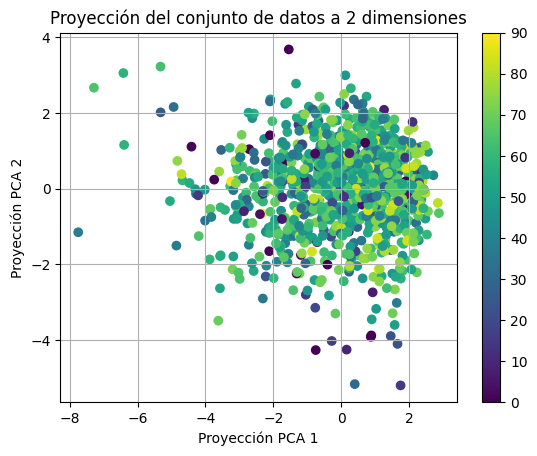

In [68]:
from sklearn.preprocessing import StandardScaler

# Estandarizamos los datos
scaler = StandardScaler()
covers_sin_popularity_estandarizado = scaler.fit_transform(covers_sin_popularity)

pca = PCA(n_components=2)
covers_sin_popularity_pca = pca.fit_transform(covers_sin_popularity_estandarizado)

# Creacion del BIPLOT
plt.scatter(covers_sin_popularity_pca[:,0], covers_sin_popularity_pca[:,1], c=covers_sin_track_artist["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

In [69]:
pca.explained_variance_ratio_

array([0.19171836, 0.10485635])

#### T-SNE

Recurrimos a métodos como TSNE para la reducción no lineal de la dimensionalidad y el modelado de la variedad de los datos.

Antes de t-SNE: (980, 14)
Despues de t-SNE: (980, 2)


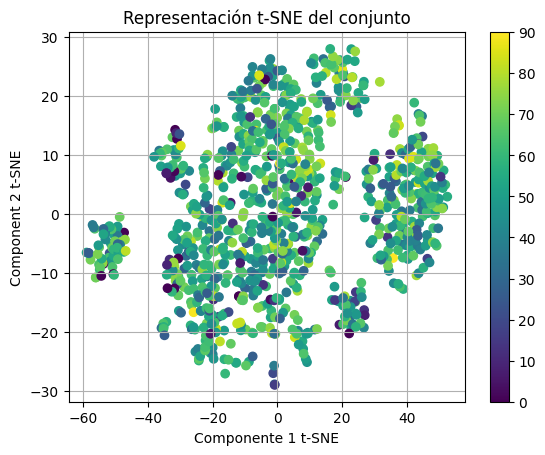

In [70]:
from sklearn.manifold import TSNE

covers_sin_popularity_tsne = TSNE(n_components=2, random_state=10).fit_transform(covers_sin_popularity_estandarizado)

# Dimensinoes pre y post TSNE
print('Antes de t-SNE: {}'.format(covers_sin_popularity_estandarizado.shape))
print('Despues de t-SNE: {}'.format(covers_sin_popularity_tsne.shape))

# Creacion del BIPLOT
plt.scatter(covers_sin_popularity_tsne[:,0], covers_sin_popularity_tsne[:,1], c=covers_sin_track_artist["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

#### UMAP

La técnica alternativa de reducción no lineal que tenemos que usar al no obtener ningún resultado que nos sirva con PCA y T-SNE.

Antes de UMAP: (980, 14)
Después de UMAP: (980, 2)


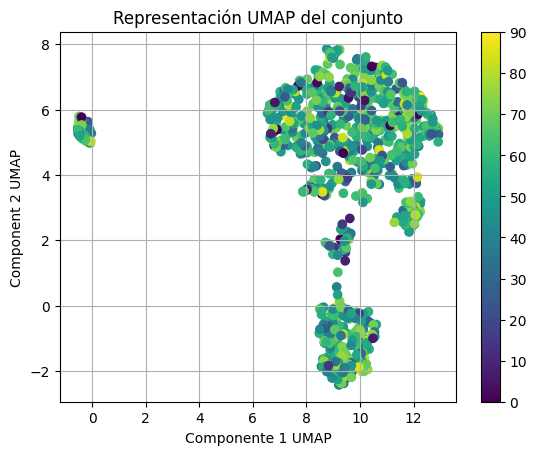

In [71]:
import umap

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
covers_sin_popularity_umap = umap.UMAP(n_components=2).fit_transform(covers_sin_popularity_estandarizado)
# imprimimos los tamaños antes y después
print('Antes de UMAP: {}'.format(covers_sin_popularity_estandarizado.shape))
print('Después de UMAP: {}'.format(covers_sin_popularity_umap.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(covers_sin_popularity_umap[:,0], covers_sin_popularity_umap[:,1], c=covers_sin_track_artist["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

#### Regresión Lineal Múltiple

Recuperamos la estandarización de PCA y le agregamos los nombres a las columnas.

In [79]:
# Metamoslo en un dataframe así no perdemos los nombres de las columnas
covers_sin_popularity_estandarizado_df = pd.DataFrame(covers_sin_popularity_estandarizado, columns=covers_sin_popularity.columns)

# Imprimir las medias y desviaciones estándar antes del escalado
print("Medias y desviaciones estándar antes del escalado:")
print(covers_sin_popularity.describe().loc[['mean', 'std']])

# Imprimir las medias y desviaciones estándar después del escalado
print("\nMedias y desviaciones estándar después del escalado:")
print(pd.DataFrame(covers_sin_popularity_estandarizado_df).describe().loc[['mean', 'std']])

Medias y desviaciones estándar antes del escalado:
      Duration  Time_Signature  Danceability    Energy       Key  Loudness  \
mean  3.609041        3.940816      0.587693  0.580877  5.191837  0.098639   
std   1.387657        0.279660      0.157856  0.202379  3.577814  0.037184   

          Mode  Speechiness  Acousticness  Instrumentalness  Liveness  \
mean  0.760204     0.059923      0.332959          0.048240  0.176269   
std   0.427177     0.065535      0.280076          0.165712  0.155862   

       Valence       Tempo         Year  
mean  0.621149  118.872768  1974.563265  
std   0.251799   27.023443     2.850564  

Medias y desviaciones estándar después del escalado:
          Duration  Time_Signature  Danceability        Energy           Key  \
mean -3.298948e-16    1.703852e-16 -2.247635e-16  1.395709e-16 -1.812609e-17   
std   1.000511e+00    1.000511e+00  1.000511e+00  1.000511e+00  1.000511e+00   

          Loudness          Mode   Speechiness  Acousticness  \
mean  1.7

Ahora entrenamos el modelo.

In [80]:
import statsmodels.api as sm

y = raw_covers['Popularity']
# Agregamos una constante como característica, para estimar la ordenada al origen
const = sm.add_constant(covers_sin_popularity_estandarizado_df)
# Ajustamos el modelo
model = sm.OLS(y, const).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     4.318
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.76e-07
Time:                        17:41:32   Log-Likelihood:                -4207.1
No. Observations:                 980   AIC:                             8444.
Df Residuals:                     965   BIC:                             8517.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               53.2898      0.570  

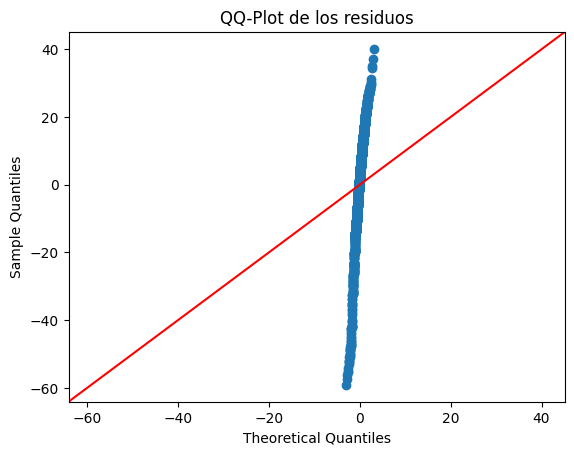

In [81]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

In [82]:
stat, p = stats.shapiro(model.resid)
print(f"Test de Shapiro-Wilk para residuos: Estadístico={stat:.3f}, p-valor={p:.6f}")

Test de Shapiro-Wilk para residuos: Estadístico=0.956, p-valor=0.000000


Graficamos el error mostrando los errores reales y los predichos.

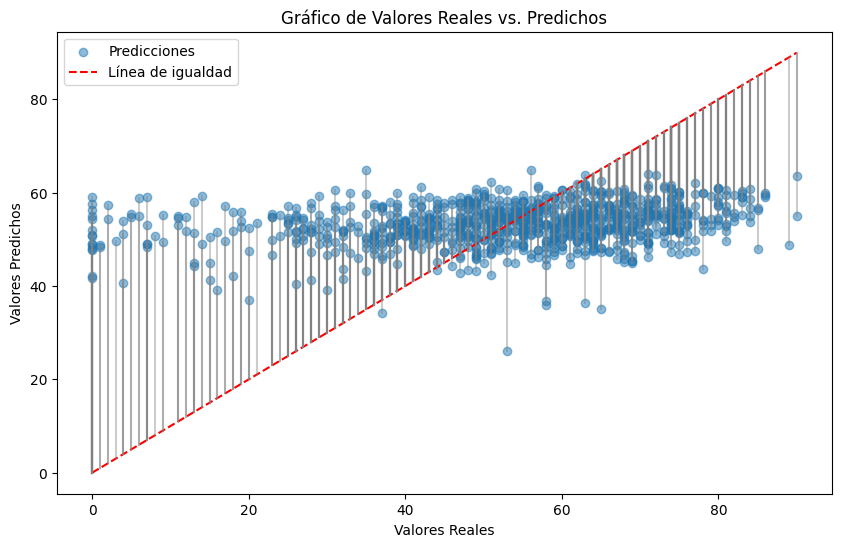

In [83]:
# Obtenemos los valores predichos y los valores reales
y_pred = model.fittedvalues
y_real = y

# Graficamos los valores predichos vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_real, y_pred, alpha=0.5, label='Predicciones')
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], color='red', linestyle='--', label='Línea de igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de Valores Reales vs. Predichos')

# Agregamos líneas de error para cada punto
for i in range(len(y_real)):
    plt.plot([y_real[i], y_real[i]], [y_real[i], y_pred[i]], color='gray', alpha=0.4)

plt.legend()
plt.show()


Tenemos un error muy elevado.

#### Regresión Logistica 

In [84]:
from sklearn.model_selection import train_test_split

copia_regresionlog = copia_test.drop(['Artist', 'Track', 'Popular'], axis=1)
copia_regresionlog['Duration'] = copia_regresionlog['Duration'].str.replace(':','.').astype(float)
X = copia_regresionlog
y = copia_test["Popular"]

# Suponiendo que 'X' y 'y' son tus datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

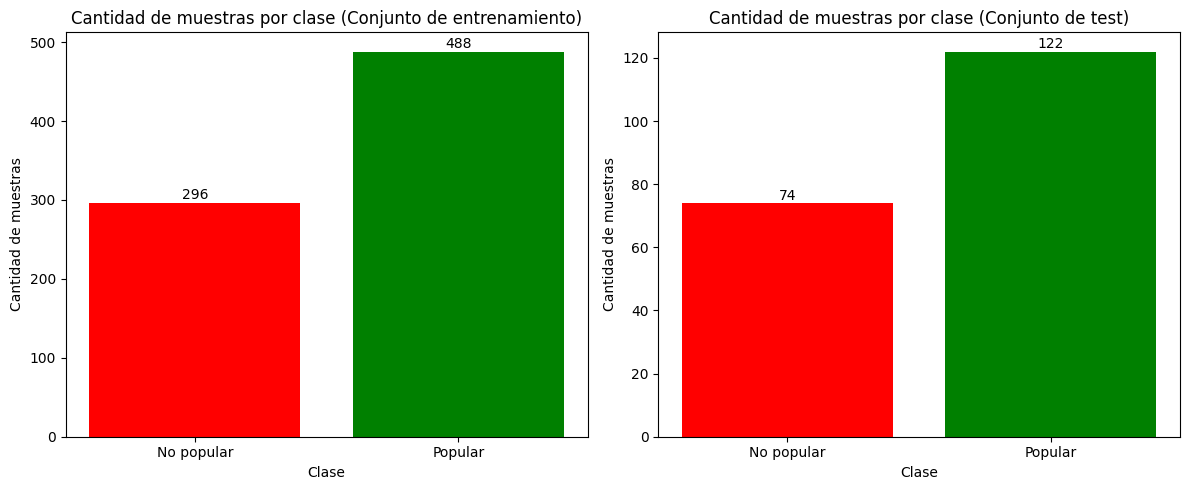

In [85]:
# Contar la cantidad de muestras de cada clase en el conjunto de entrenamiento
train_class_counts = pd.Series(y_train).value_counts()

# Contar la cantidad de muestras de cada clase en el conjunto de prueba
test_class_counts = pd.Series(y_test).value_counts()

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar la cantidad de muestras de cada clase en el conjunto de entrenamiento
bars_train = axes[0].bar(train_class_counts.index, train_class_counts.values, color=['green', 'red'])
axes[0].set_title('Cantidad de muestras por clase (Conjunto de entrenamiento)')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Cantidad de muestras')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No popular', 'Popular'])

# Agregar etiquetas sobre las barras del gráfico de entrenamiento
for bar in bars_train:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', ha='center', fontsize=10)

# Graficar la cantidad de muestras de cada clase en el conjunto de prueba
bars_test = axes[1].bar(test_class_counts.index, test_class_counts.values, color=['green', 'red'])
axes[1].set_title('Cantidad de muestras por clase (Conjunto de test)')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Cantidad de muestras')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No popular', 'Popular'])

# Agregar etiquetas sobre las barras del gráfico de test
for bar in bars_test:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', fontsize=10)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [86]:
# Ajustar StandardScaler sobre X_train
scaler = StandardScaler()
scaler.fit(X_train)

# Estandarizar X_train y X_test usando el scaler ajustado
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

In [87]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística (penalty None indica que no queremos regularizacion)
logistic_model = LogisticRegression(penalty=None, random_state=10)

# Entrenar el modelo con los datos de entrenamiento estandarizados
logistic_model.fit(X_train_stand, y_train)

LogisticRegression(penalty=None, random_state=10)

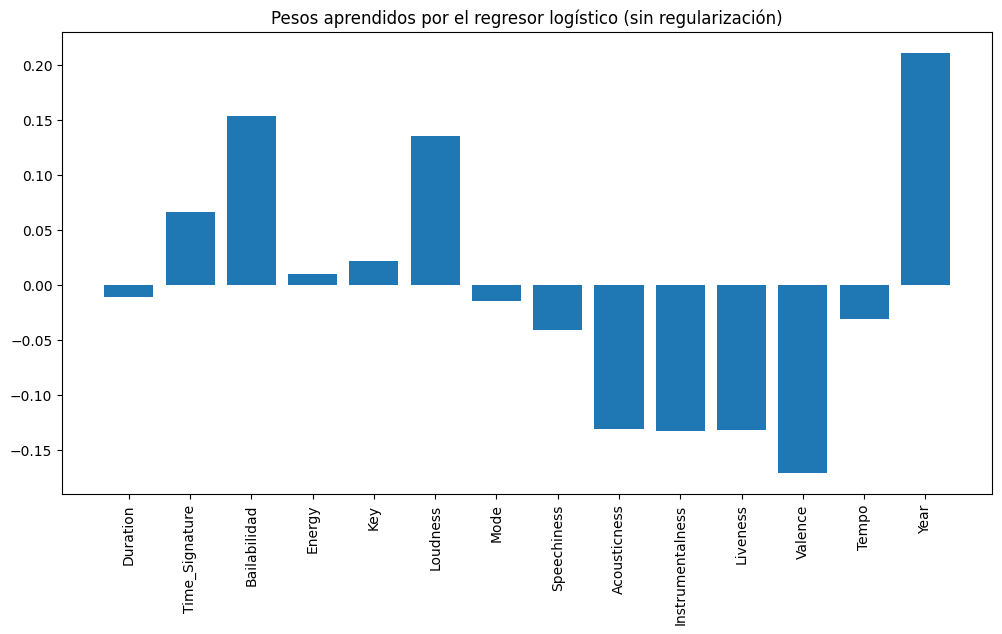

In [88]:
# Recuperamos los coeficientes del modelo logístico
theta_logistic = logistic_model.coef_

# Graficamos los coeficientes del modelo logístico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, theta_logistic.size), np.squeeze(theta_logistic))
labels = copia_regresionlog.columns
ax.set_xticks(np.arange(0, theta_logistic.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.set_title('Pesos aprendidos por el regresor logístico (sin regularización)')
plt.show()

In [89]:
from sklearn.model_selection import cross_val_score

# Crear un modelo de Regresión Logística baseline
baseline_logistic_model = LogisticRegression(penalty=None, random_state=10)

# Realizar la validación cruzada y calcular la precisión
cv_scores = cross_val_score(baseline_logistic_model, X_train_stand, y_train, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Exactitud en cada fold:", cv_scores)
print("Exactitud promedio:", cv_scores.mean())
print("Desvío de la Exactitud:", cv_scores.std())

# Dejamos el modelo entrenado al final
baseline_logistic_model.fit(X_train_stand, y_train)

Exactitud en cada fold: [0.66878981 0.5477707  0.62420382 0.60509554 0.6025641 ]
Exactitud promedio: 0.6096847950351135
Desvío de la Exactitud: 0.039011089180767185


LogisticRegression(penalty=None, random_state=10)

In [90]:
from sklearn.model_selection import GridSearchCV

# Definir los valores de alpha que queremos probar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crear un modelo de Regresión Logística
logistic_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=10)

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_stand, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)
# Imprimir la mejor exactitud encontrada
print("Mejor exactitud:", grid_search.best_score_)


Mejores parámetros: {'C': 0.001}
Mejor exactitud: 0.6224481463334967


In [91]:
# Obtener el mejor modelo
best_logistic_model = grid_search.best_estimator_

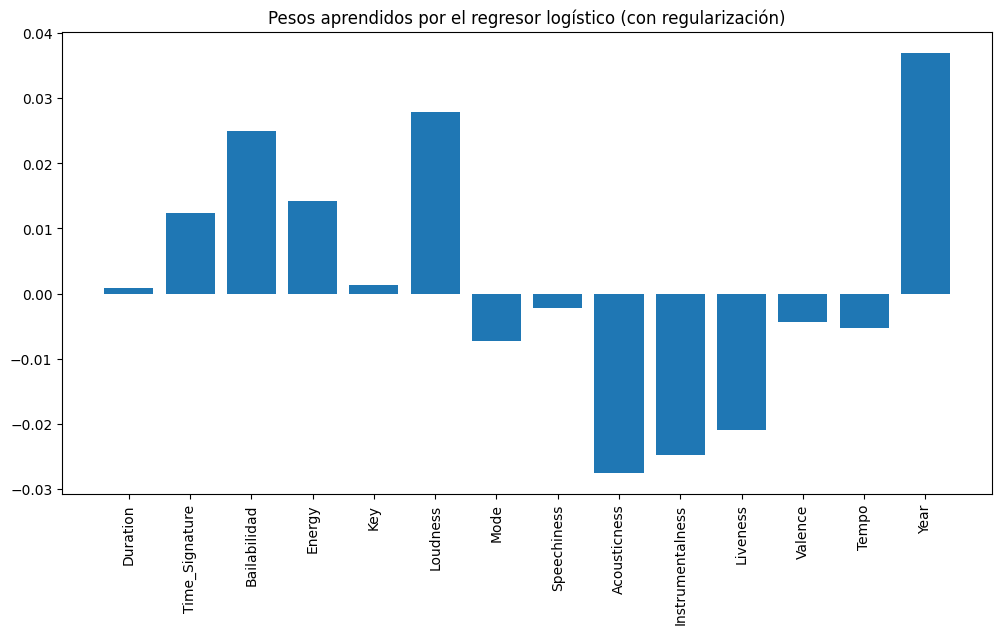

In [92]:
# Recuperamos los coeficientes del modelo logístico
best_theta_logistic = best_logistic_model.coef_

# Graficamos los coeficientes del modelo logístico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, best_theta_logistic.size), np.squeeze(best_theta_logistic))
labels = copia_regresionlog.columns
ax.set_xticks(np.arange(0, best_theta_logistic.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.set_title('Pesos aprendidos por el regresor logístico (con regularización)')
plt.show()

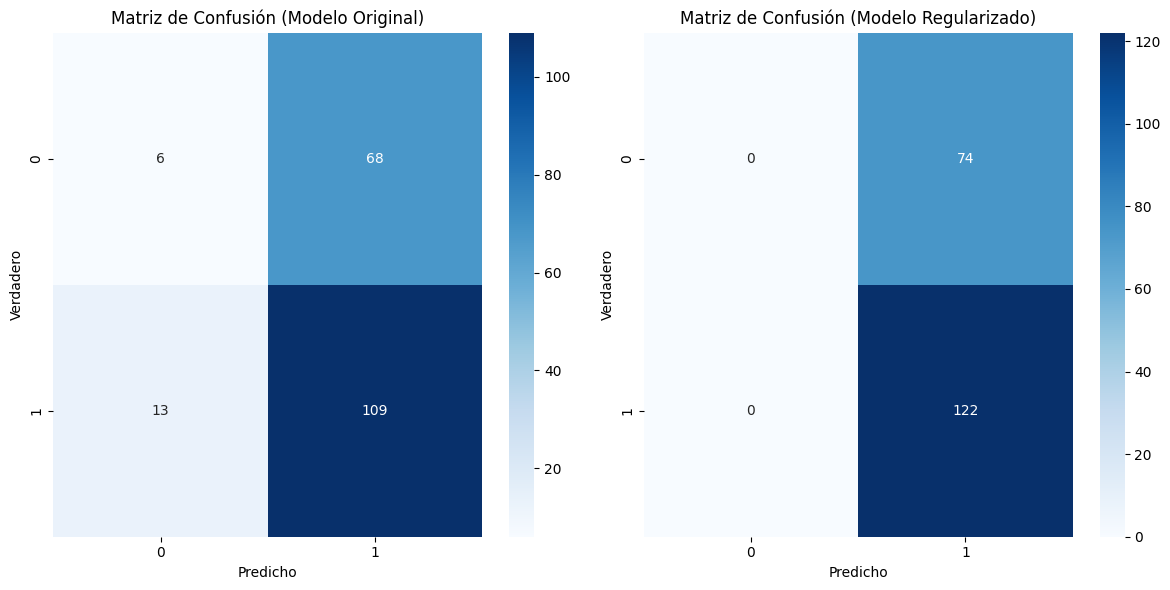

Exactitud del modelo original: 0.5867346938775511
Exactitud del mejor modelo regularizado: 0.6224489795918368


In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predecir con el modelo original en X_test_stand
y_pred_original = baseline_logistic_model.predict(X_test_stand)

# Calcular la exactitud y la matriz de confusión del modelo original
accuracy_original = accuracy_score(y_test, y_pred_original)
confusion_matrix_original = confusion_matrix(y_test, y_pred_original)

# Obtener las clases únicas para etiquetar los ejes
clases_unicas = np.sort(y_test.unique())  # Aseguramos que las clases estén ordenadas

# Predecir con el mejor modelo regularizado en X_test_stand
y_pred_best = best_logistic_model.predict(X_test_stand)

# Calcular la exactitud y la matriz de confusión del mejor modelo regularizado
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_matrix_best = confusion_matrix(y_test, y_pred_best)

# Crear una figura con dos subgráficas lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graficar la matriz de confusión del modelo original
sns.heatmap(confusion_matrix_original, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clases_unicas, yticklabels=clases_unicas, ax=axes[0])
axes[0].set_title('Matriz de Confusión (Modelo Original)')
axes[0].set_xlabel('Predicho')
axes[0].set_ylabel('Verdadero')

# Graficar la matriz de confusión del modelo regularizado
sns.heatmap(confusion_matrix_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clases_unicas, yticklabels=clases_unicas, ax=axes[1])
axes[1].set_title('Matriz de Confusión (Modelo Regularizado)')
axes[1].set_xlabel('Predicho')
axes[1].set_ylabel('Verdadero')

# Ajustar el diseño para que las etiquetas no se superpongan
plt.tight_layout()

# Mostrar la figura
plt.show()

# Imprimir las exactitudes de los modelos
print("Exactitud del modelo original:", accuracy_original)
print("Exactitud del mejor modelo regularizado:", accuracy_best)
